<a href="https://colab.research.google.com/github/hun9008/ML_TeamProject_24SS/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import seaborn as sns
import pickle
import random
from PIL import Image
import PIL
PIL.Image

<module 'PIL.Image' from '/usr/local/lib/python3.10/dist-packages/PIL/Image.py'>

In [3]:
cd /content/drive/MyDrive/data/

/content/drive/.shortcut-targets-by-id/1G6SgIRKCYt5sUkkaCAiAmdP0_hZA-rFs/data


In [4]:
ls

blurr_cut_png/   gray_cut_jpg/     images_gray_jpg/  images_png/  MNIST/
cut_resize_jpg/  images_cut2_png/  images_gray_png/  incipient/   no/
cut_resize_png/  images_cut_jpg/   images_jpg/       mature/      overripe/


In [5]:
# 데이터 경로 설정
image_path = "/content/drive/MyDrive/data/"

# 라벨별 분포


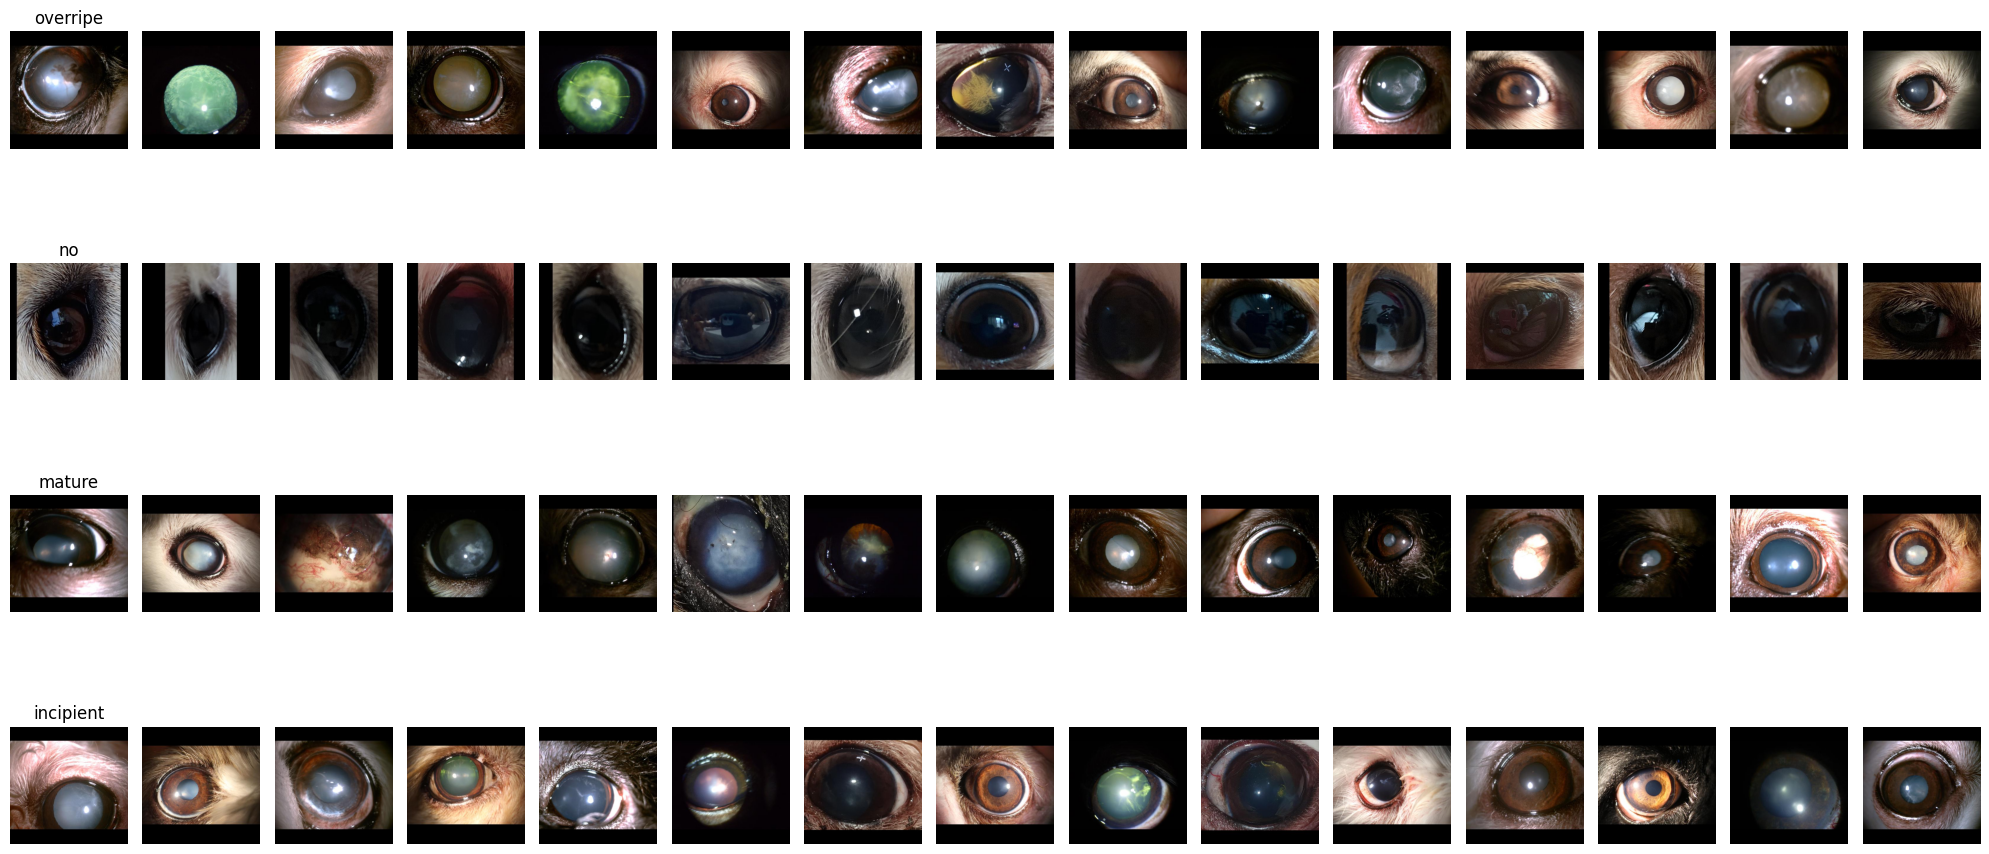

In [6]:
# 각 클래스별 디렉토리 경로
class_dirs = ['overripe', 'no', 'mature', 'incipient']

# 출력할 이미지 개수
num_images = 15

# 이미지 출력을 위한 서브플롯 생성
fig, axs = plt.subplots(len(class_dirs), num_images, figsize=(20, 10))

for i, class_dir in enumerate(class_dirs):
    # 클래스 디렉토리 내의 모든 이미지 파일 경로 리스트 생성
    image_files = [os.path.join(image_path, class_dir, filename)
                   for filename in os.listdir(os.path.join(image_path, class_dir))
                   if filename.endswith('.jpg') or filename.endswith('.png')]

    # 이미지 파일 경로 리스트에서 랜덤하게 15개 선택
    selected_files = random.sample(image_files, num_images)

    for j, file_path in enumerate(selected_files):
        # 이미지 파일 읽기
        img = Image.open(file_path)

        # 이미지 출력
        axs[i, j].imshow(img)
        axs[i, j].axis('off')

        # 첫 번째 이미지에만 클래스 레이블 표시
        if j == 0:
            axs[i, j].set_title(class_dir)

plt.tight_layout()
plt.show()

# 데이터 정보 시각화



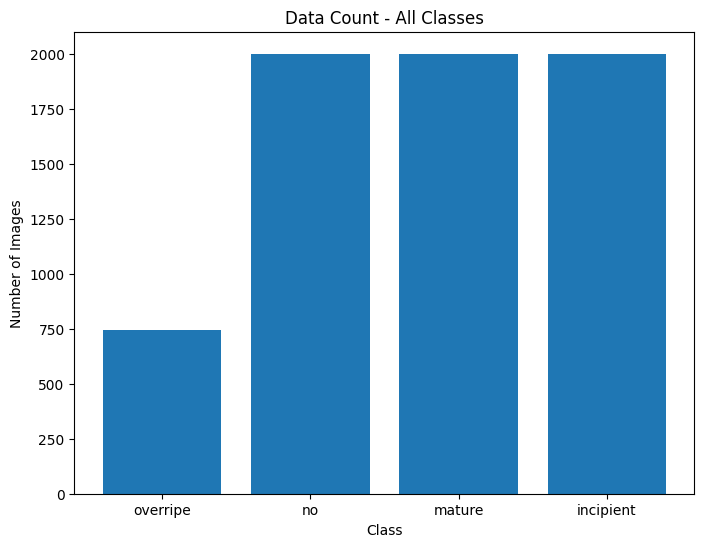

In [7]:
import os
import matplotlib.pyplot as plt

# 각 클래스별 디렉토리 경로
class_dirs = ['overripe', 'no', 'mature', 'incipient']

# 데이터 수를 저장할 딕셔너리
data_counts = {}

# 각 클래스별로 데이터 수 조사
for class_dir in class_dirs:
    class_path = os.path.join(image_path, class_dir)

    # 클래스 디렉토리 내의 모든 이미지 파일 수 계산
    num_files = len([f for f in os.listdir(class_path) if f.endswith(('.png', '.jpg', '.jpeg'))])

    data_counts[class_dir] = num_files

# 데이터 수를 막대 그래프로 시각화
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(class_dirs, [data_counts[class_dir] for class_dir in class_dirs])

ax.set_title("Data Count - All Classes")
ax.set_xlabel("Class")
ax.set_ylabel("Number of Images")

plt.show()

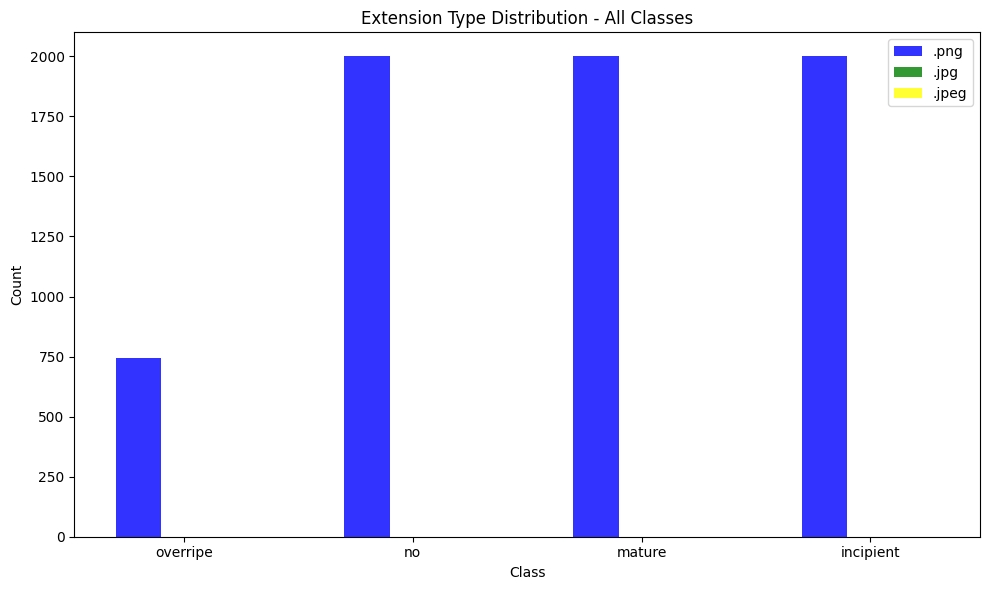

In [8]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# 각 클래스별 디렉토리 경로
class_dirs = ['overripe', 'no', 'mature', 'incipient']

# 확장자 타입을 저장할 딕셔너리
extension_types = {}

# 각 클래스별로 확장자 타입 조사
for class_dir in class_dirs:
    class_path = os.path.join(image_path, class_dir)

    extension_counts = {}

    # 클래스 디렉토리 내의 모든 이미지 파일에 대해 반복
    for filename in os.listdir(class_path):
        _, extension = os.path.splitext(filename)
        extension = extension.lower()

        if extension in ['.png', '.jpg', '.jpeg']:
            if extension not in extension_counts:
                extension_counts[extension] = 0
            extension_counts[extension] += 1

    extension_types[class_dir] = extension_counts

# 확장자 타입별 색상 설정
extension_colors = {'.png': 'blue', '.jpg': 'green', '.jpeg': 'yellow'}

# 확장자 타입을 막대 그래프로 시각화
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
opacity = 0.8
index = np.arange(len(class_dirs))

for i, extension in enumerate(['.png', '.jpg', '.jpeg']):
    counts = [extension_types[class_dir].get(extension, 0) for class_dir in class_dirs]
    ax.bar(index + i * bar_width, counts, bar_width, alpha=opacity, color=extension_colors[extension], label=extension)

ax.set_title("Extension Type Distribution - All Classes")
ax.set_xlabel("Class")
ax.set_ylabel("Count")
ax.set_xticks(index + bar_width)
ax.set_xticklabels(class_dirs)
ax.legend()

plt.tight_layout()
plt.show()

# 전체적인 색 분포를 시각화

털 색에 대해 표현하고 싶었지만 배경색과 털의 색을 구분 할 방법이 떠오르지 않음.

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# 각 클래스별 디렉토리 경로
class_dirs = ['overripe', 'no', 'mature', 'incipient']

# 전체 색상 분포를 저장할 딕셔너리
total_color_distribution = {}

# 전체 이미지에 대한 색상 분포 조사
for class_dir in class_dirs:
    class_path = os.path.join(image_path, class_dir)

    # 클래스 디렉토리 내의 모든 이미지 파일에 대해 반복
    for filename in os.listdir(class_path):
        filepath = os.path.join(class_path, filename)

        # 이미지 파일 읽기
        with Image.open(filepath) as img:
            # 이미지의 색상 정보 추출
            colors = img.getcolors(img.size[0] * img.size[1])

            # 각 색상의 빈도를 전체 색상 분포에 추가
            for count, color in colors:
                if color not in total_color_distribution:
                    total_color_distribution[color] = 0
                total_color_distribution[color] += count

# 가장 빈도가 높은 색상 선택
most_frequent_color = max(total_color_distribution, key=total_color_distribution.get)

# 색상 분포 시각화
fig, ax = plt.subplots(figsize=(8, 6))

colors = list(total_color_distribution.keys())
counts = list(total_color_distribution.values())

# 색상을 16진수 코드로 변환
hex_colors = ['#{:02x}{:02x}{:02x}'.format(*color) for color in colors]

# 가장 빈도가 높은 색상의 인덱스 찾기
most_frequent_index = colors.index(most_frequent_color)

# 막대 그래프 그리기
bars = ax.bar(range(len(colors)), counts, color=hex_colors)

# 가장 빈도가 높은 색상 강조
bars[most_frequent_index].set_color('red')
bars[most_frequent_index].set_edgecolor('black')
bars[most_frequent_index].set_linewidth(2)

ax.set_title("Total Color Distribution")
ax.set_xlabel("Color")
ax.set_ylabel("Count")
ax.set_xticks([])  # 색상 레이블 제거

# 가장 빈도가 높은 색상 정보 출력
most_frequent_hex = '#{:02x}{:02x}{:02x}'.format(*most_frequent_color)
print(f"Most Frequent Color: {most_frequent_hex}")

plt.tight_layout()
plt.show()

이미지 채널 분석

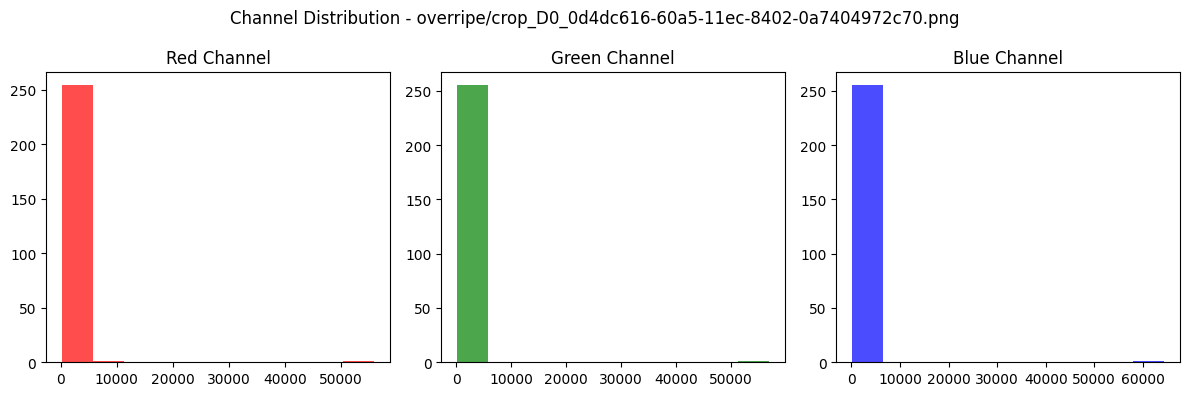

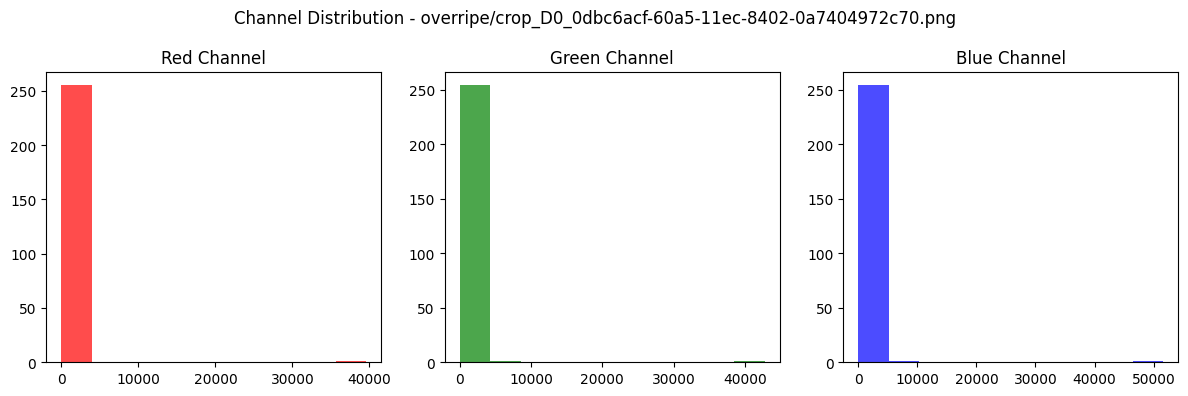

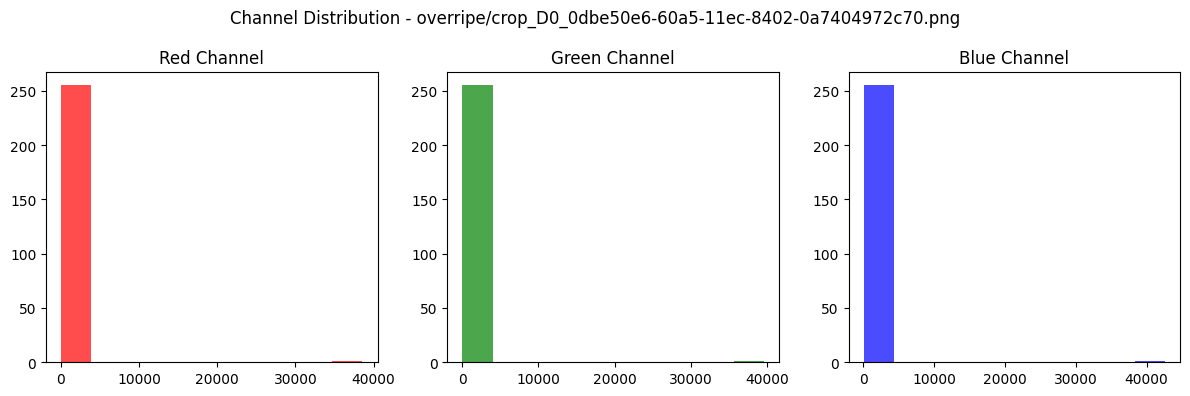

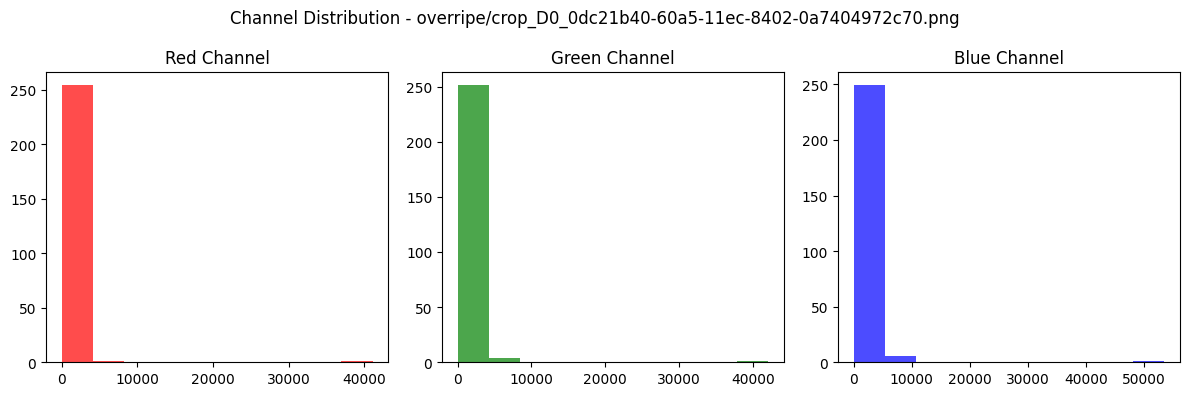

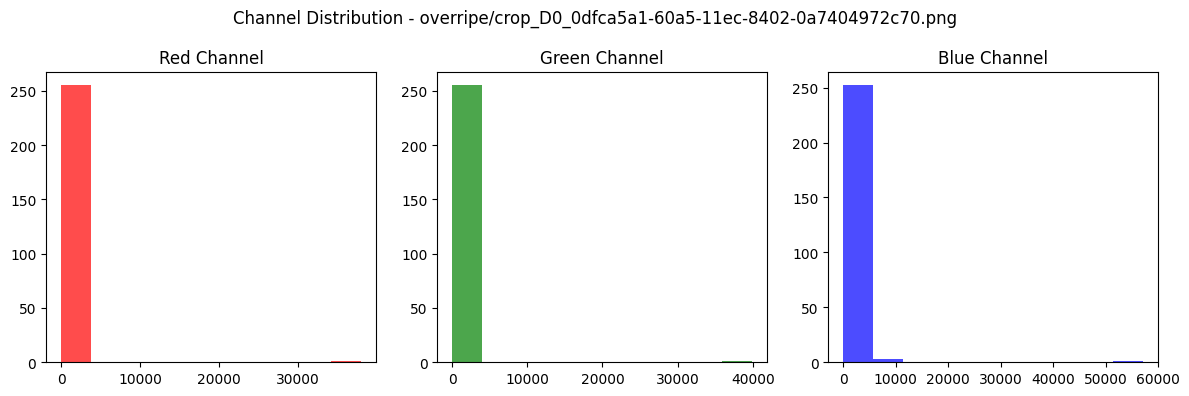

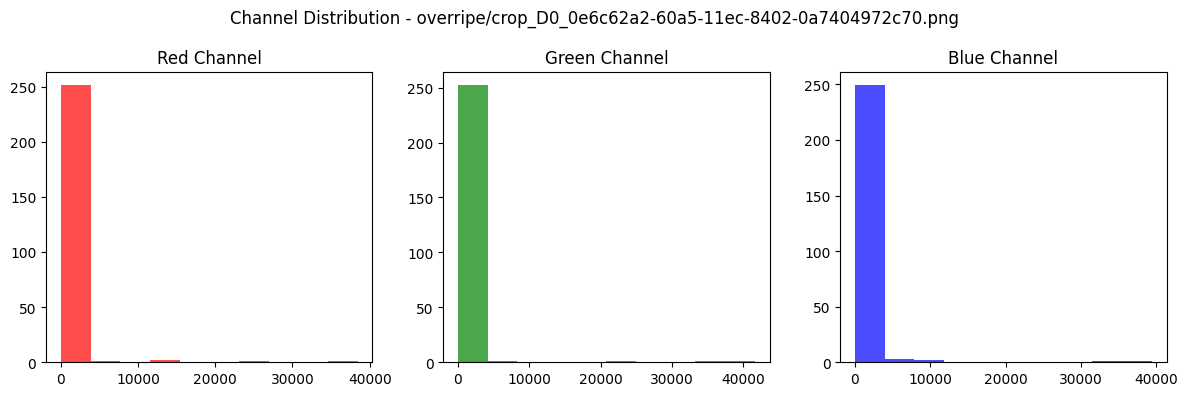

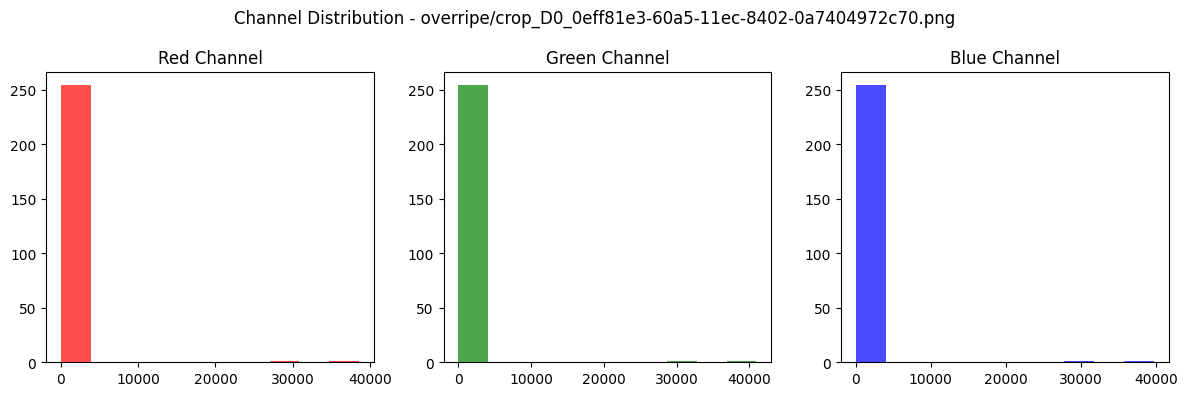

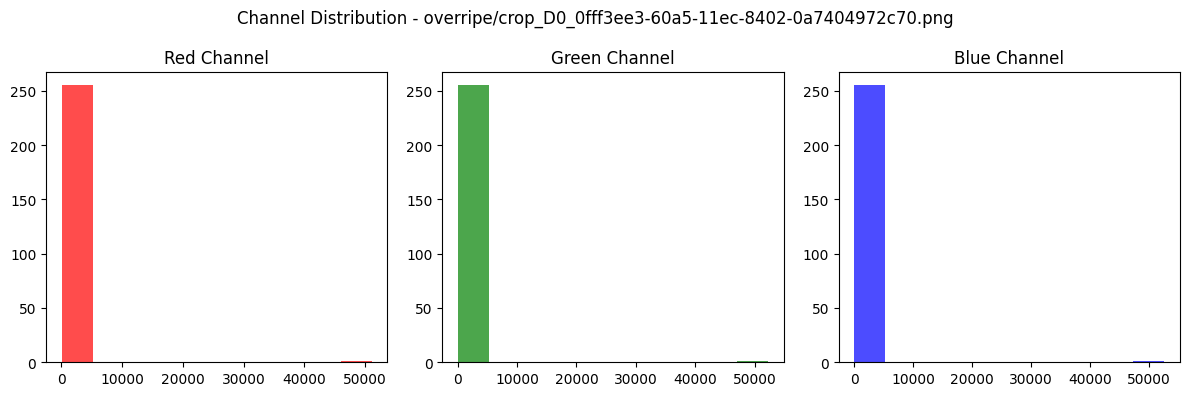

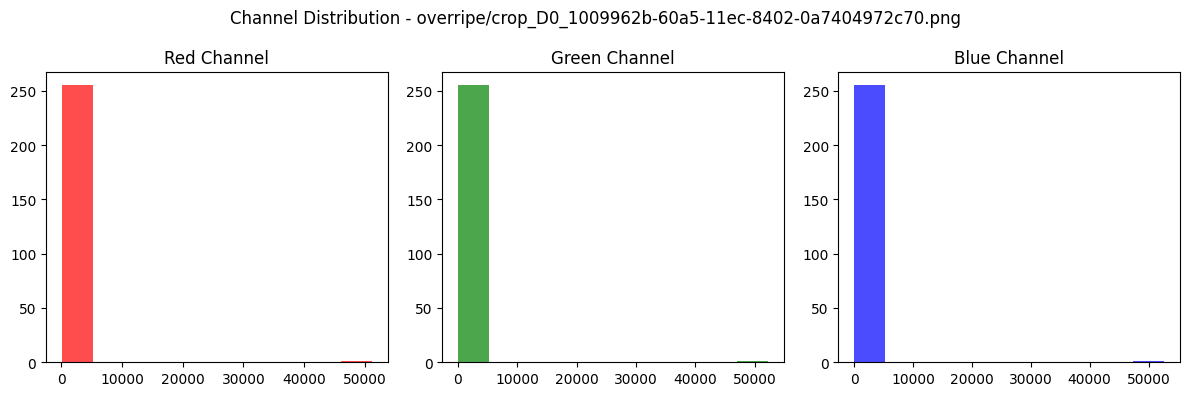

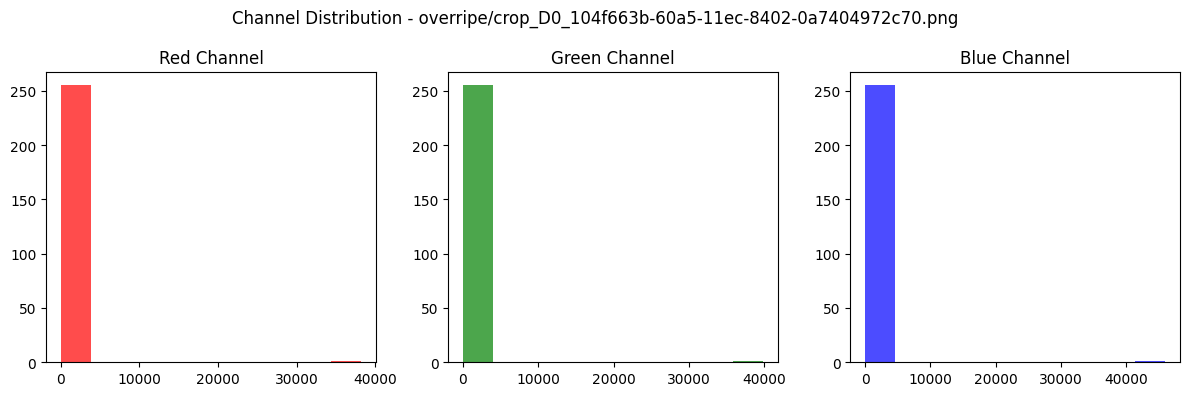

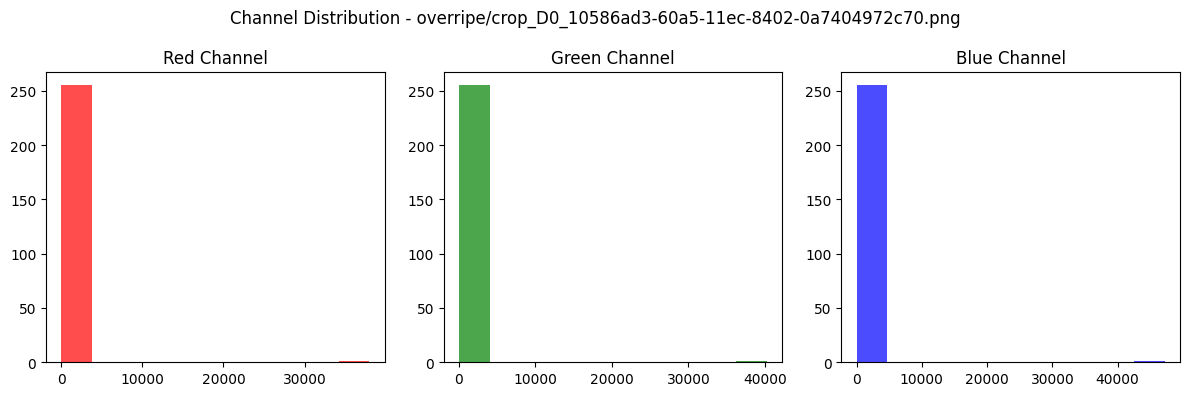

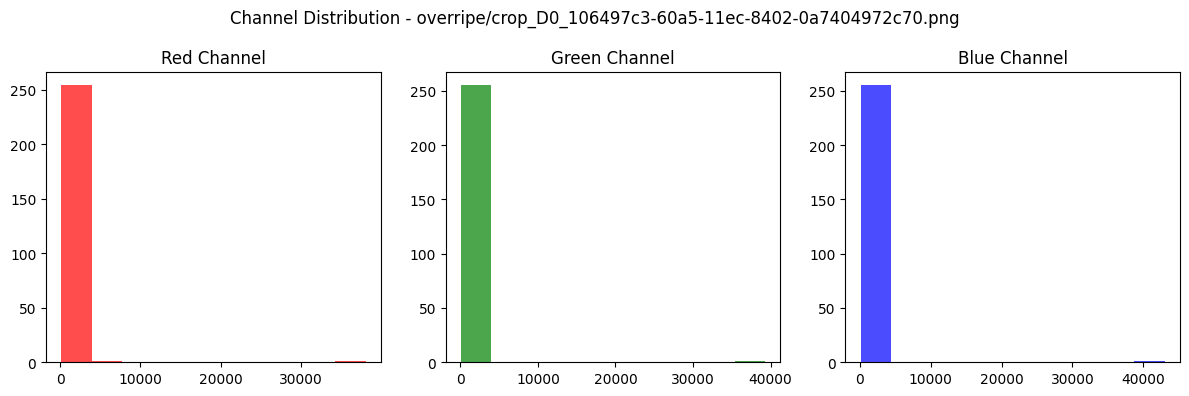

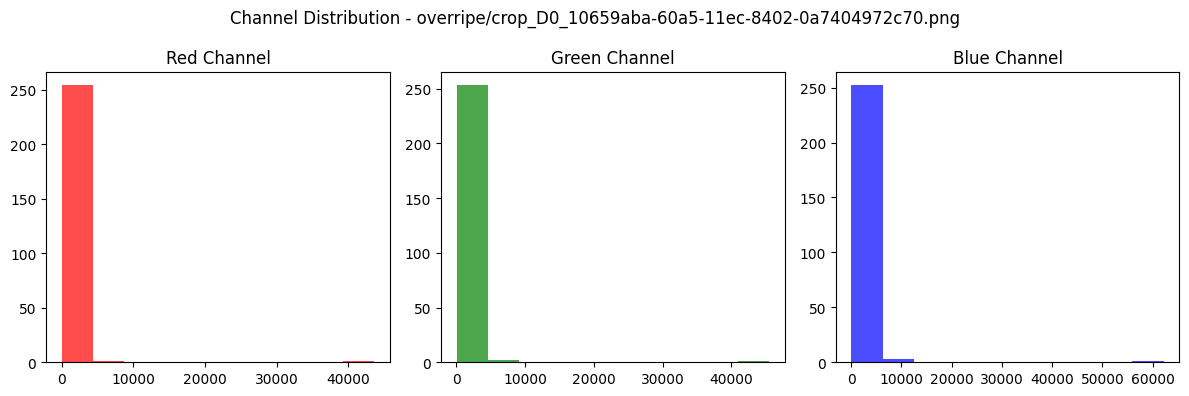

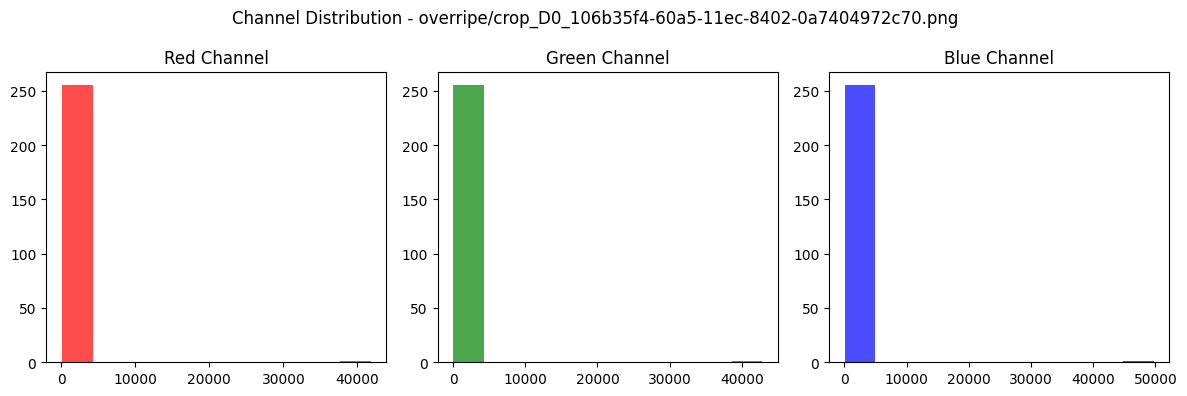

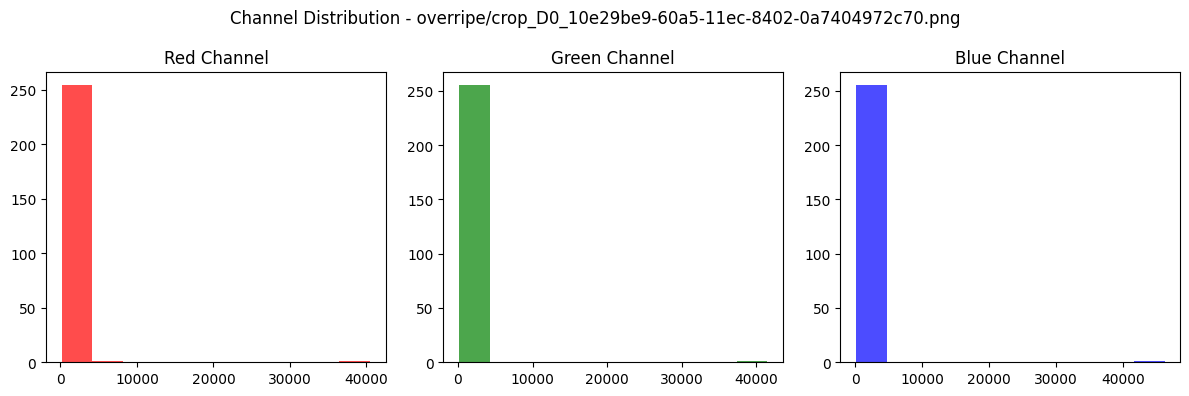

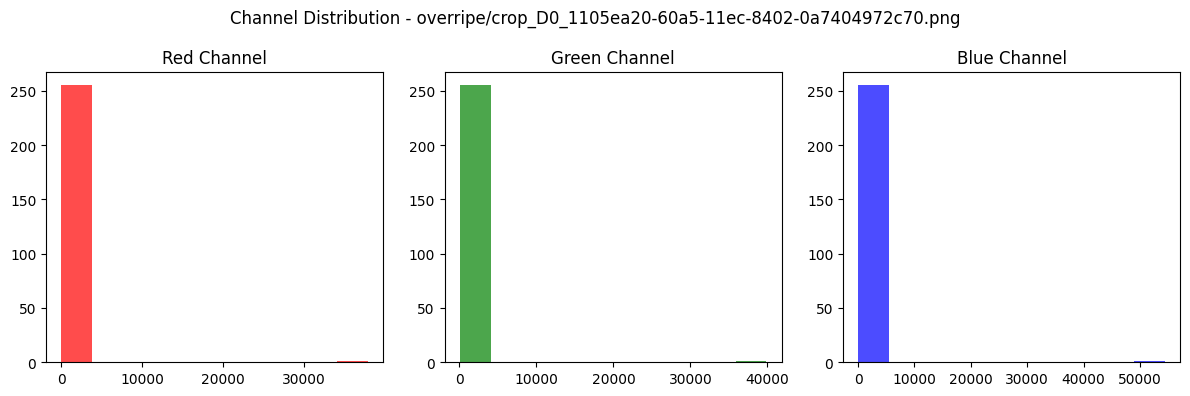

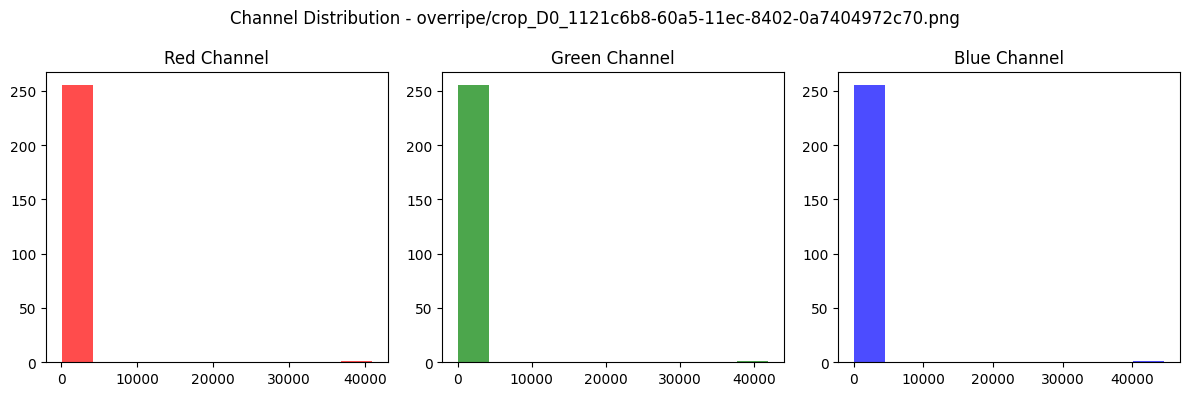

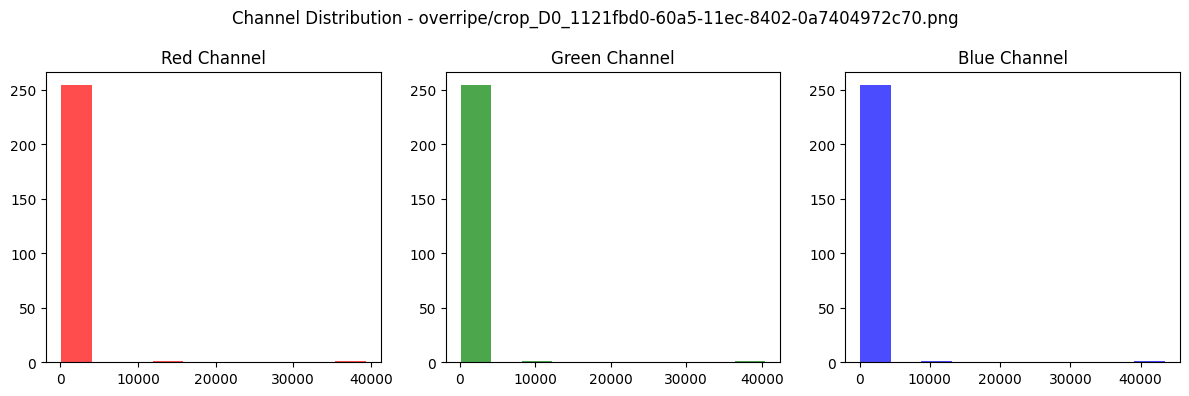

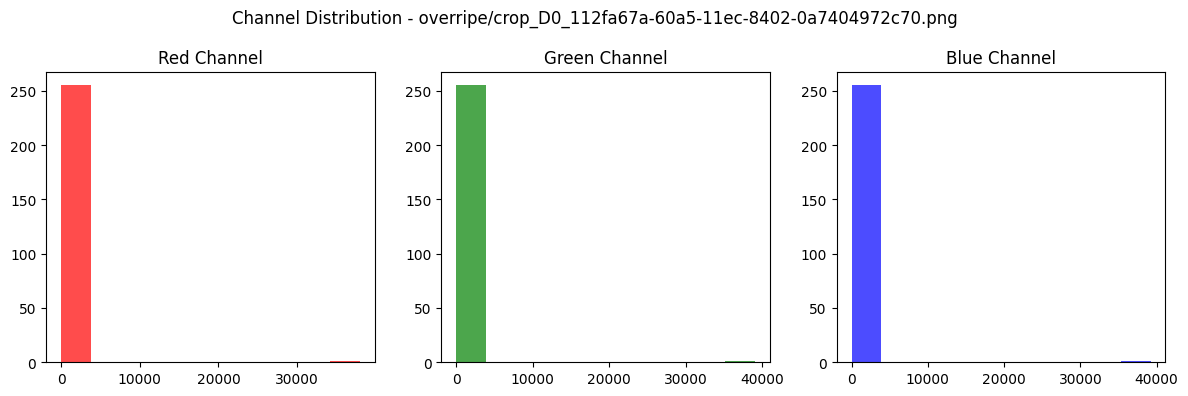

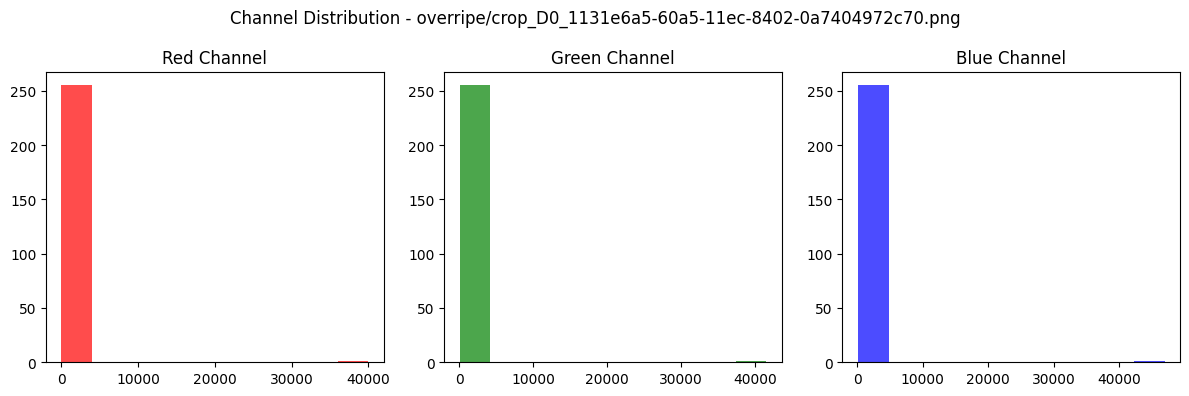

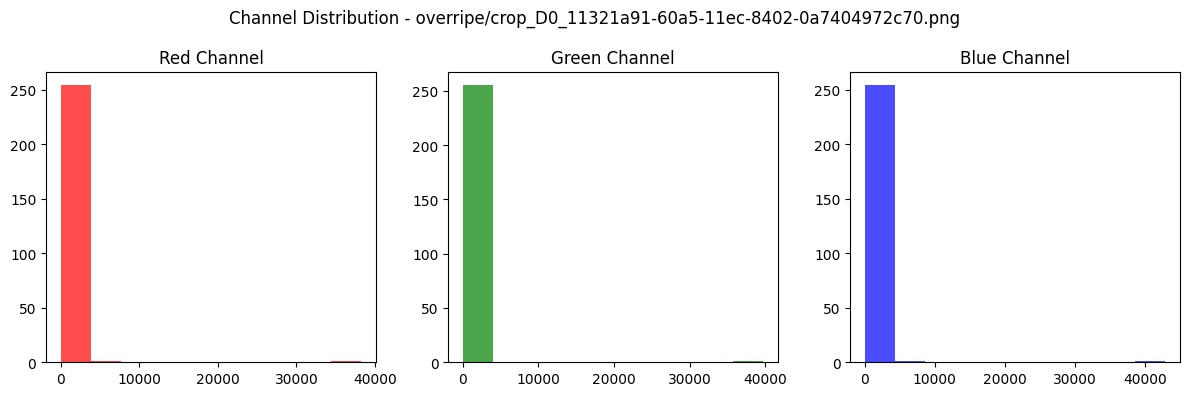

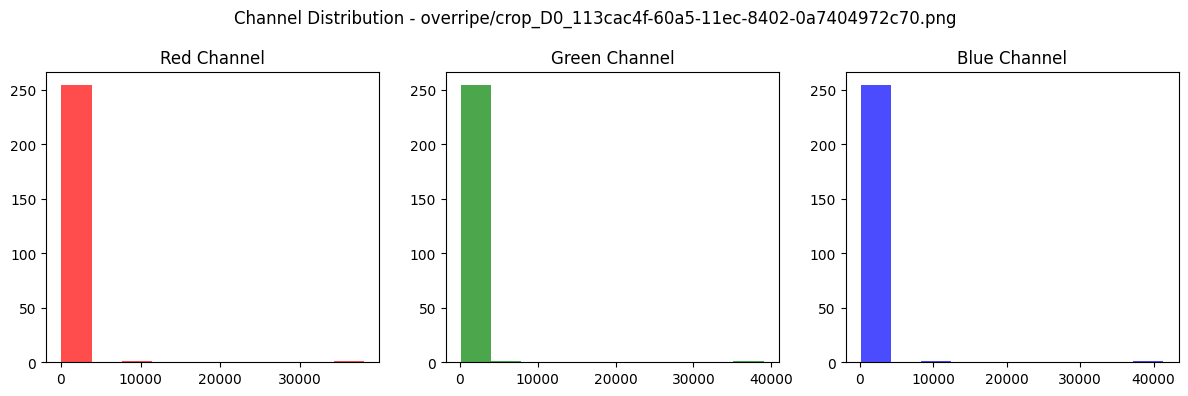

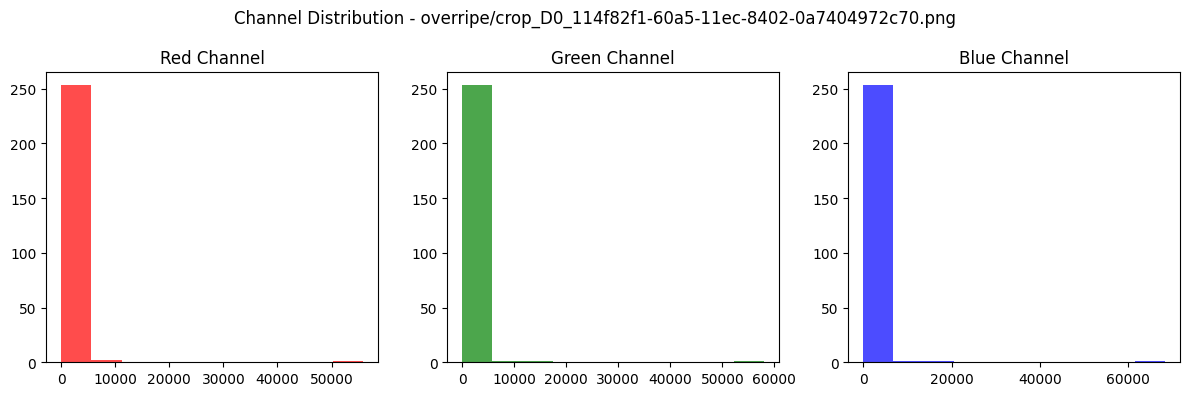

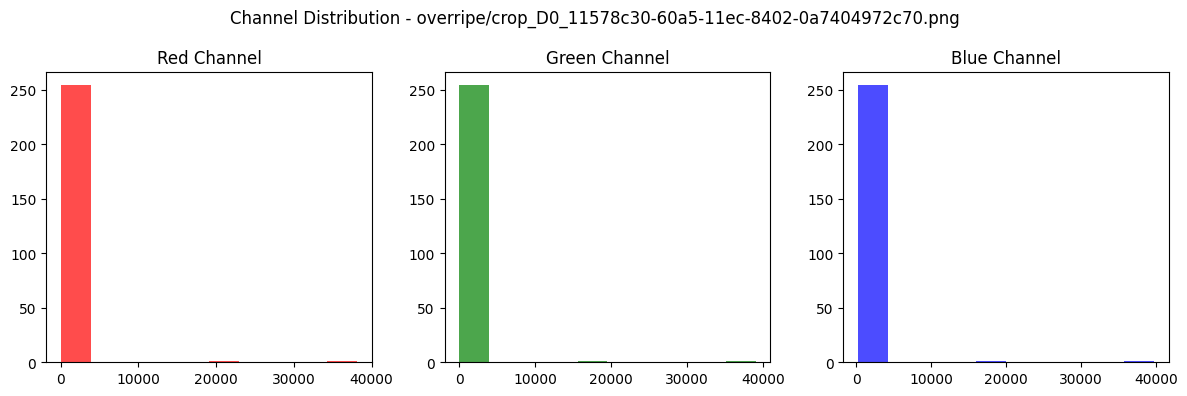

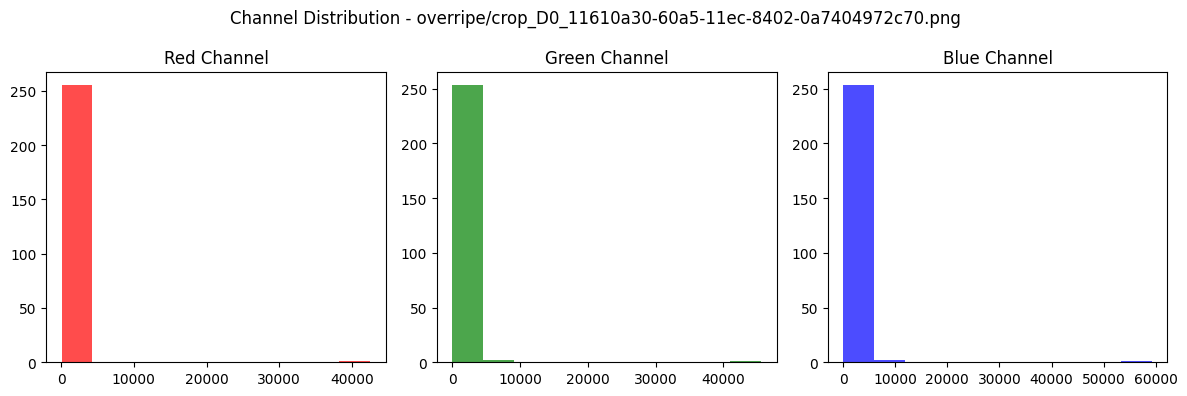

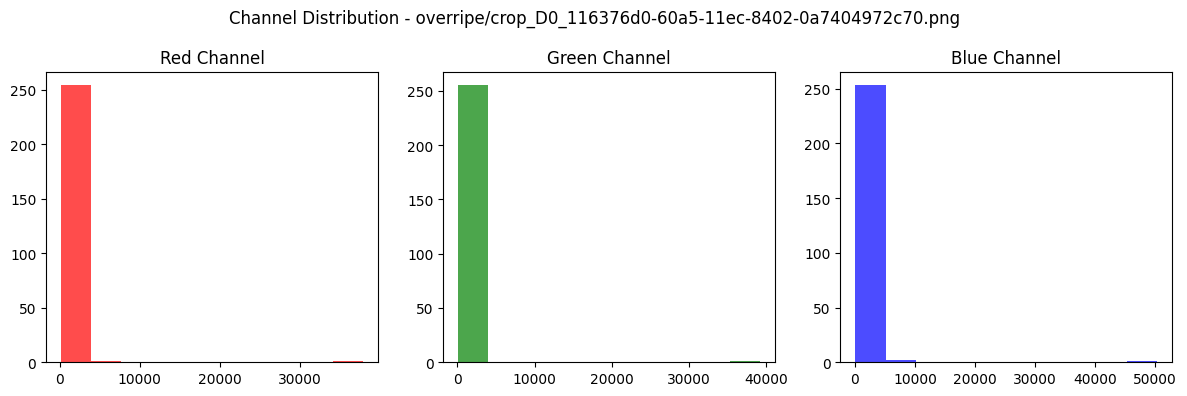

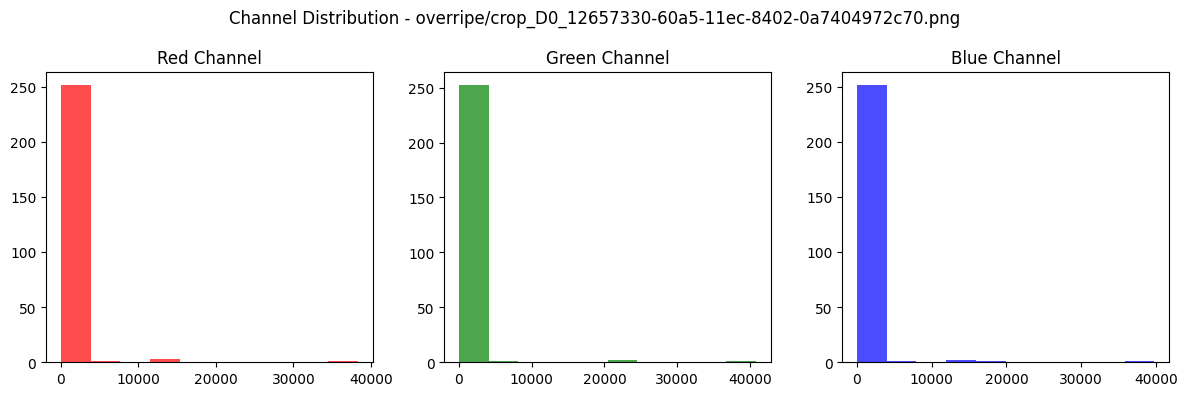

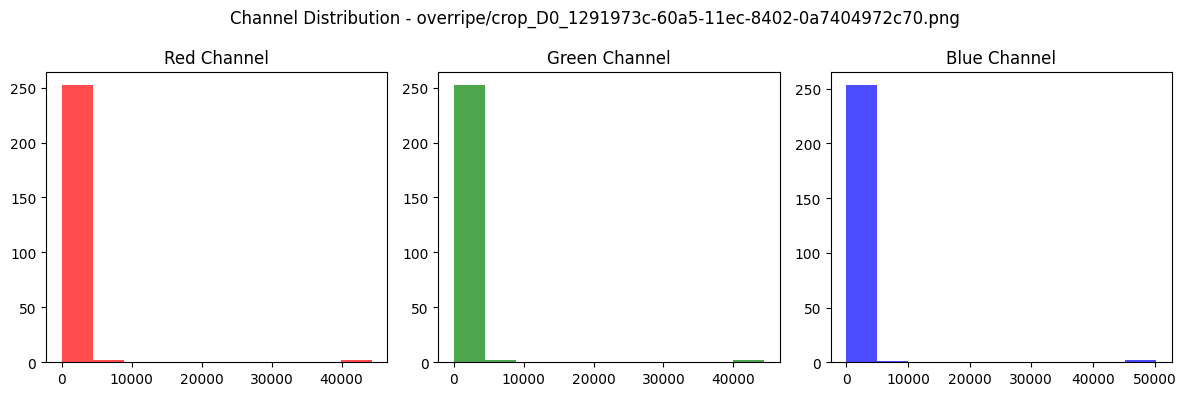

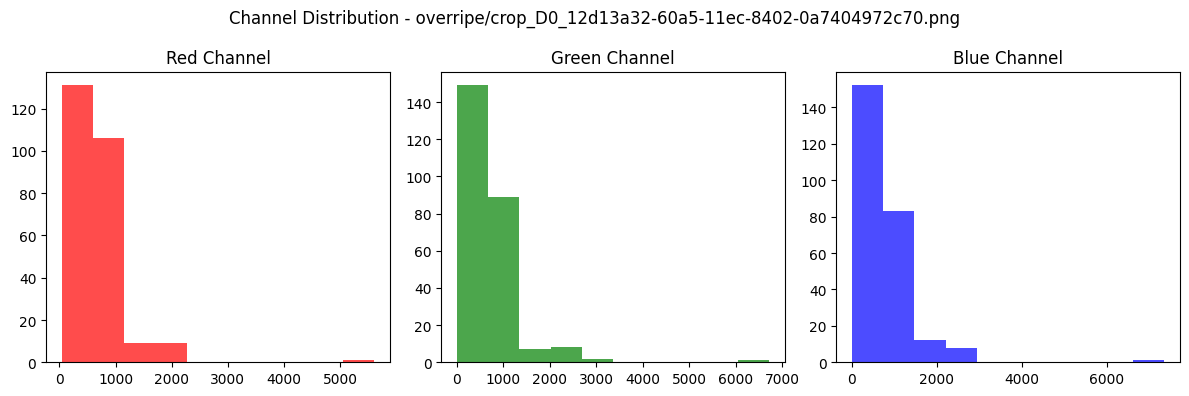

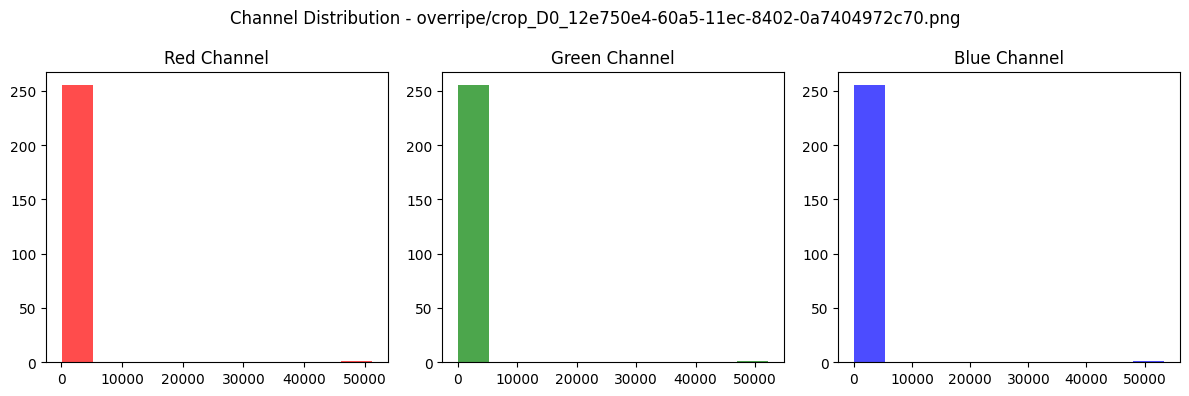

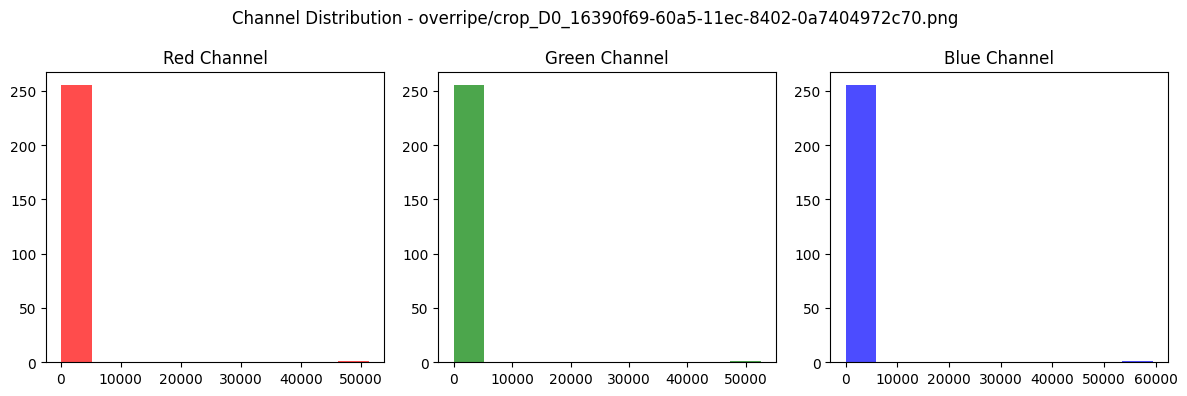

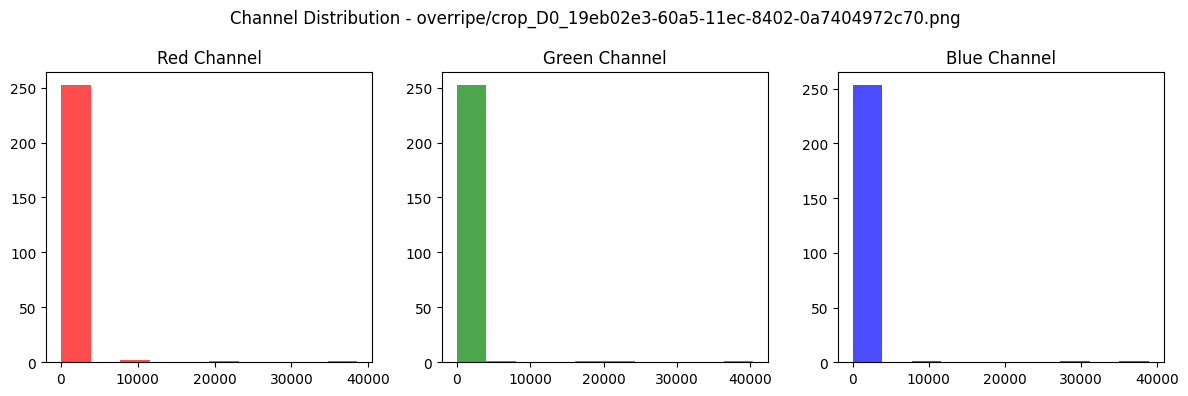

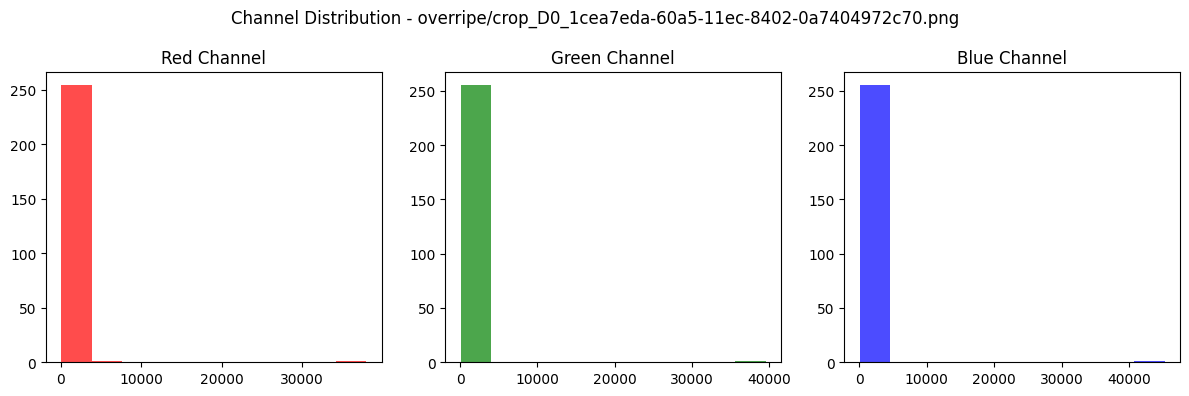

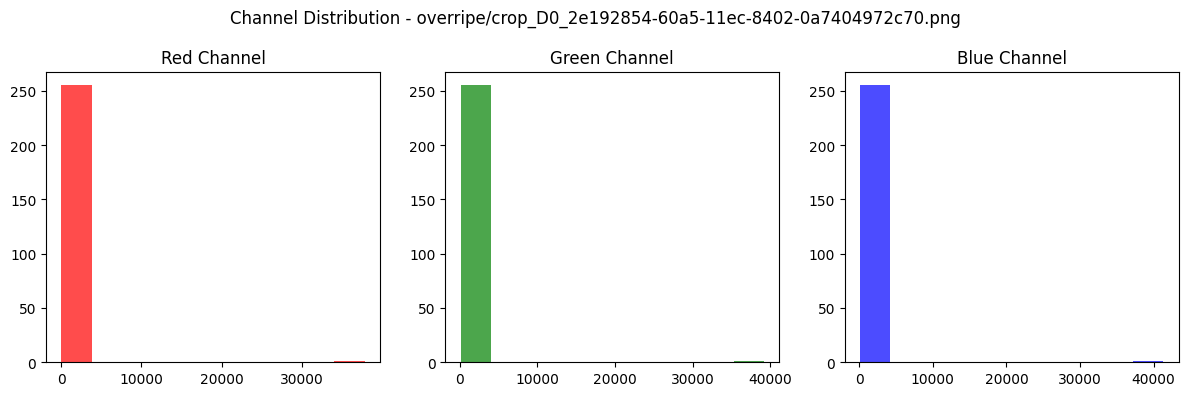

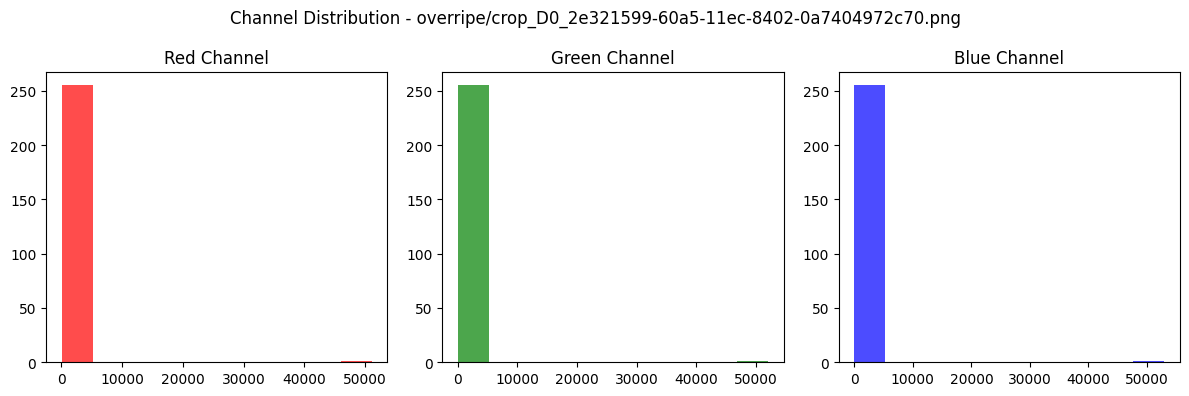

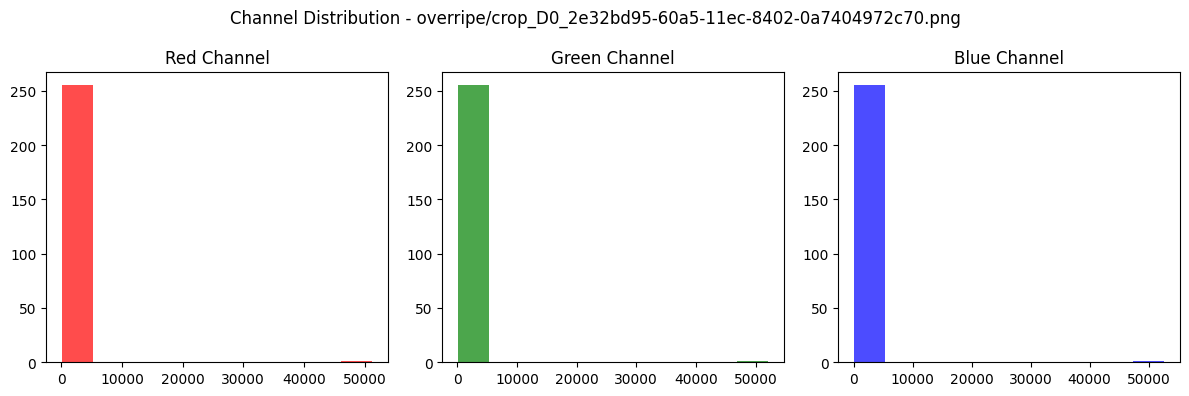

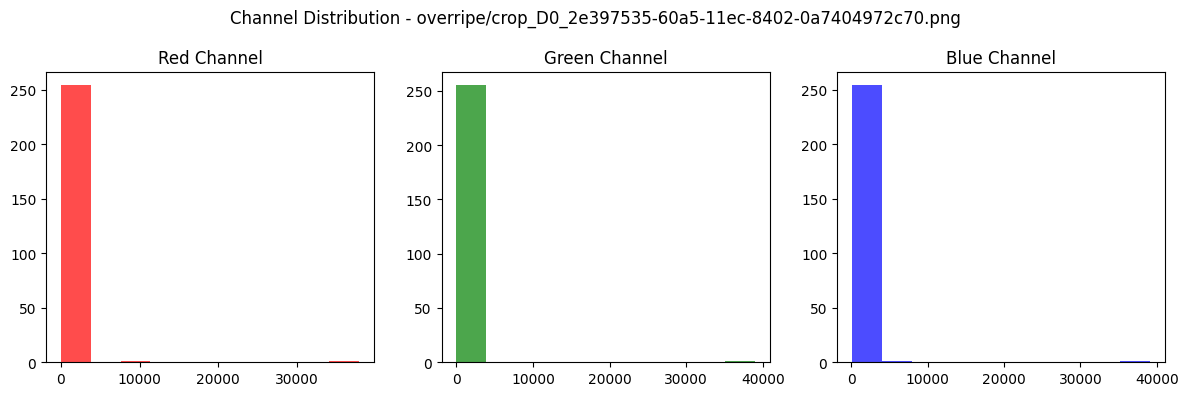

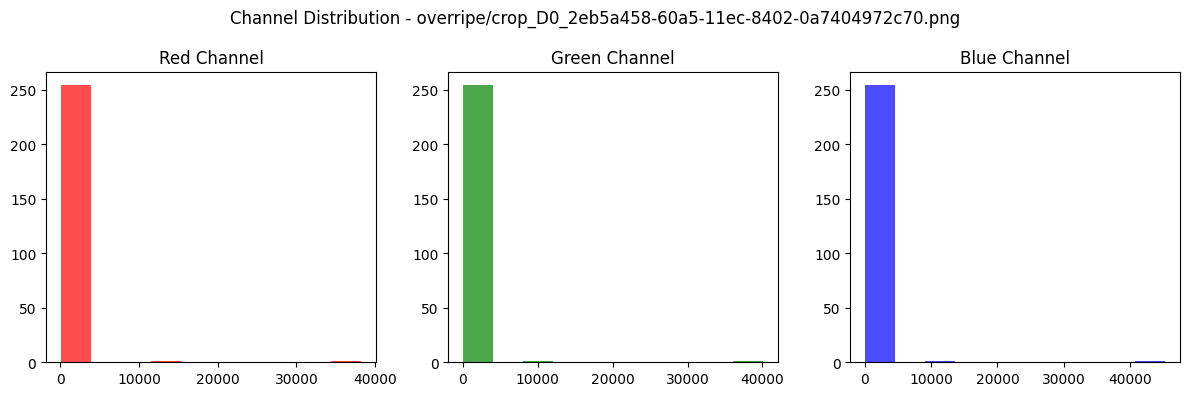

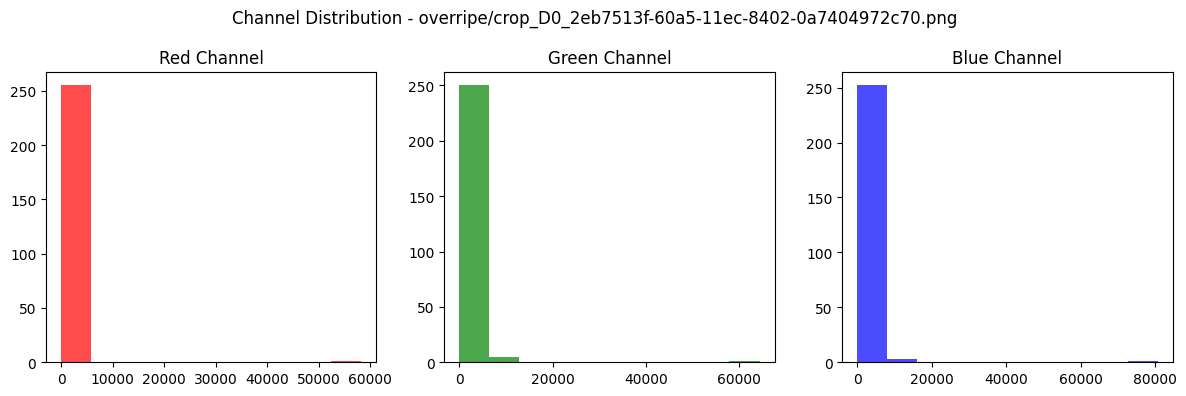

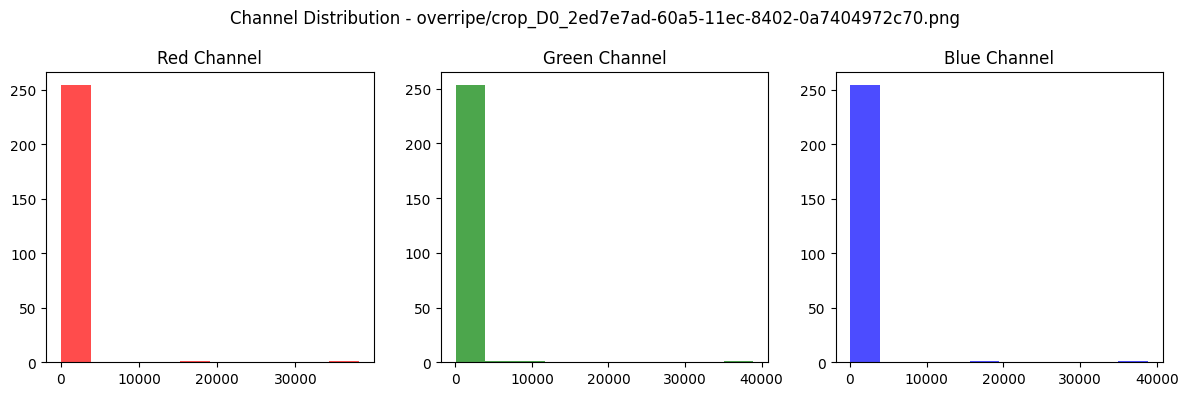

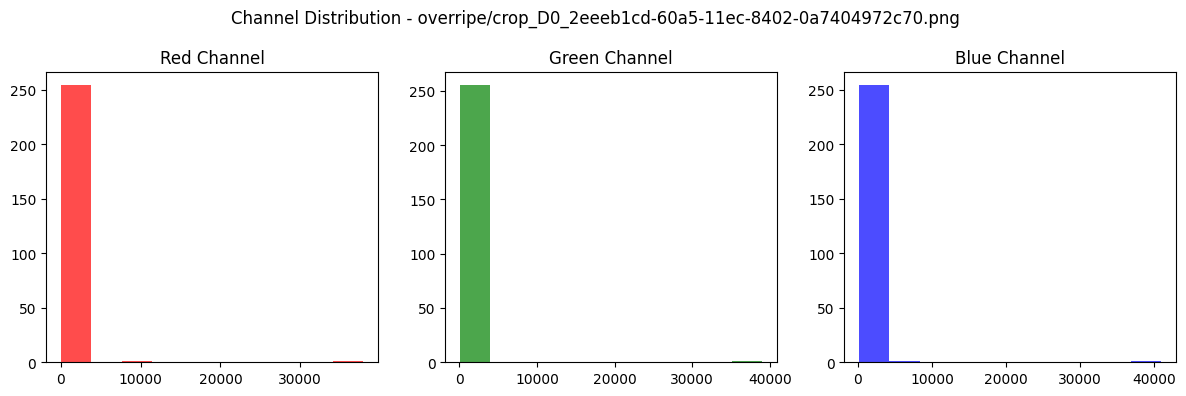

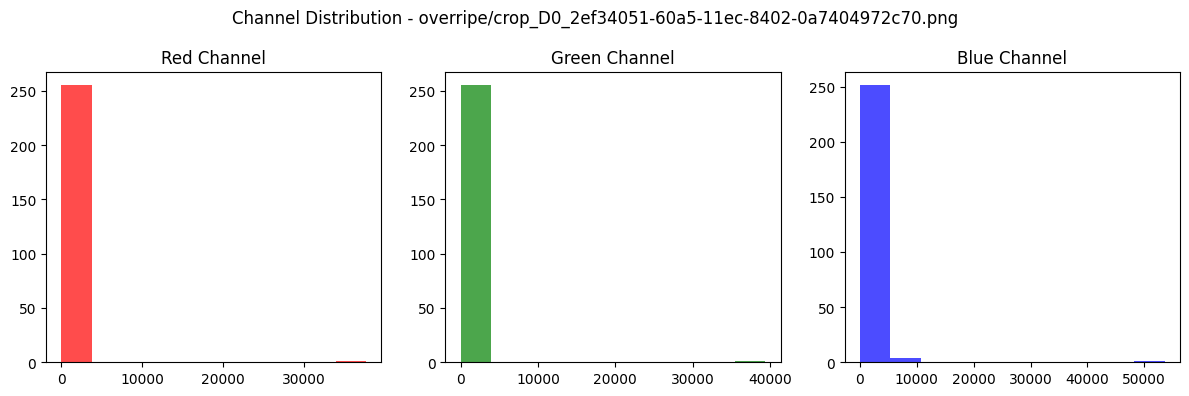

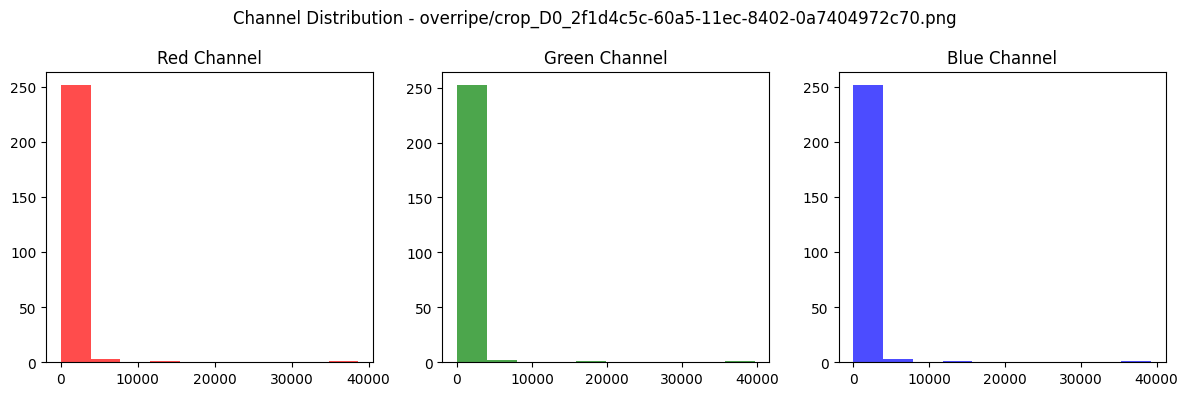

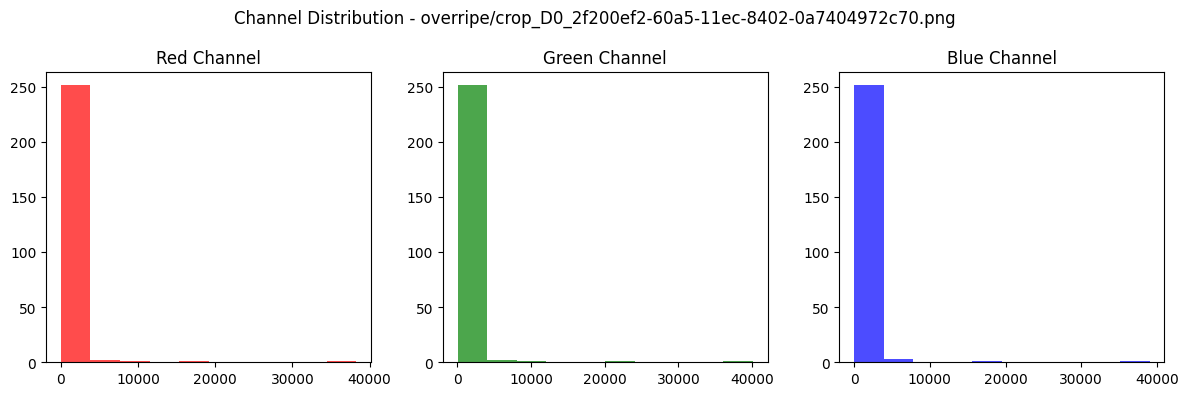

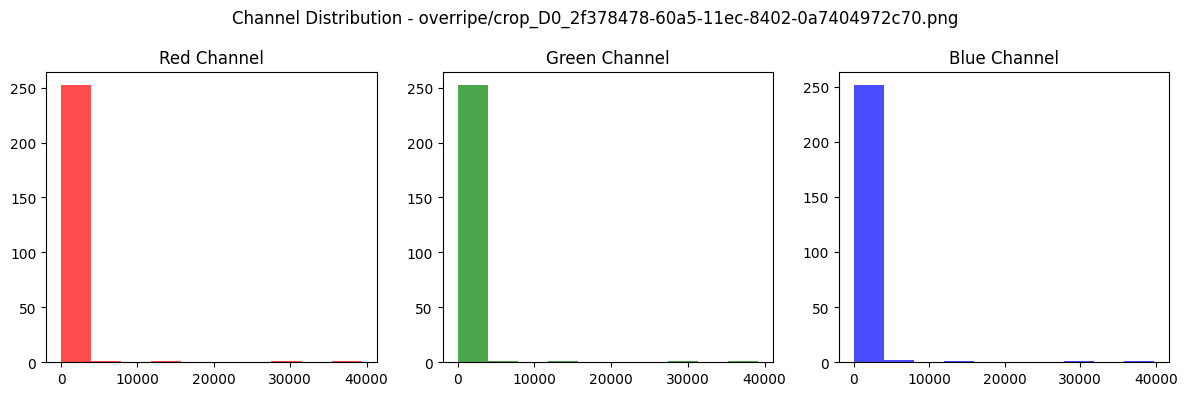

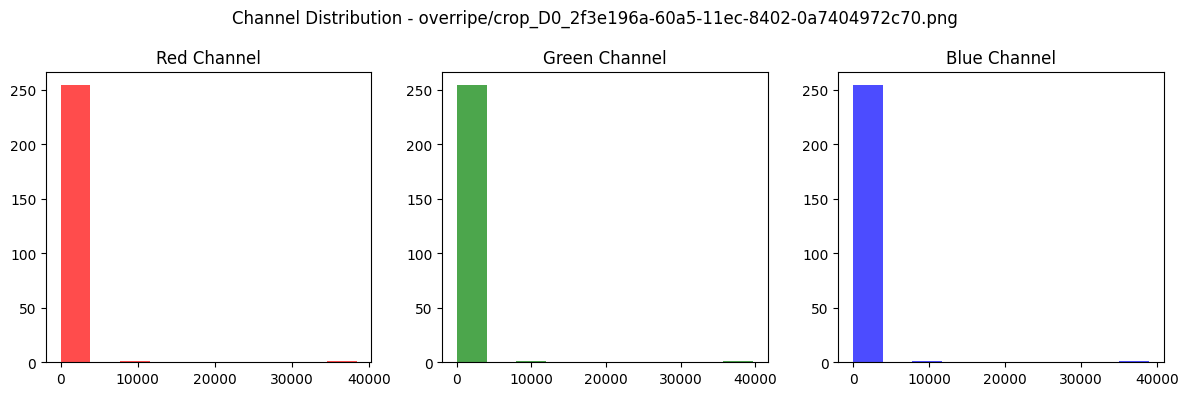

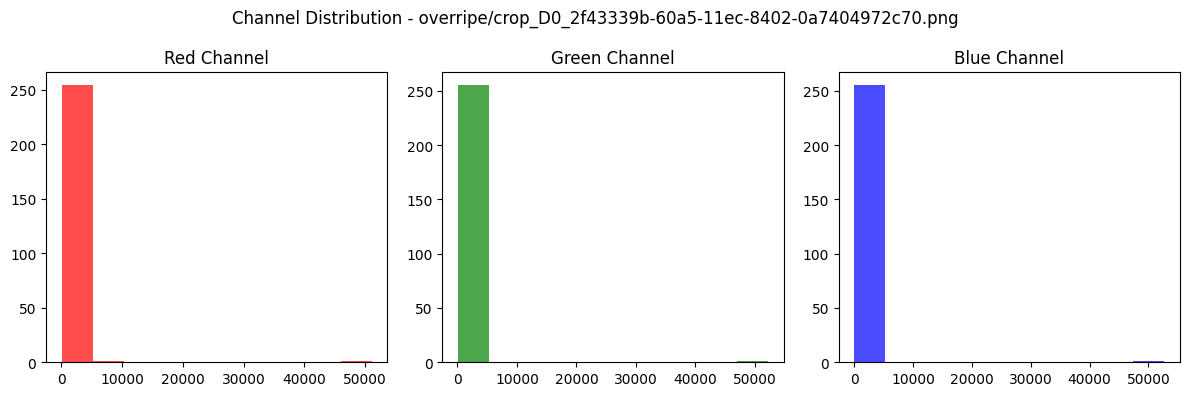

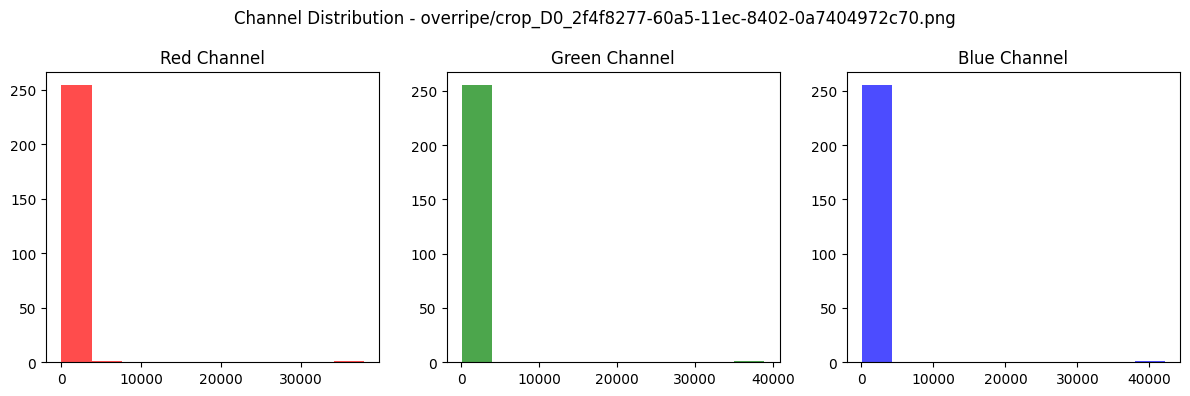

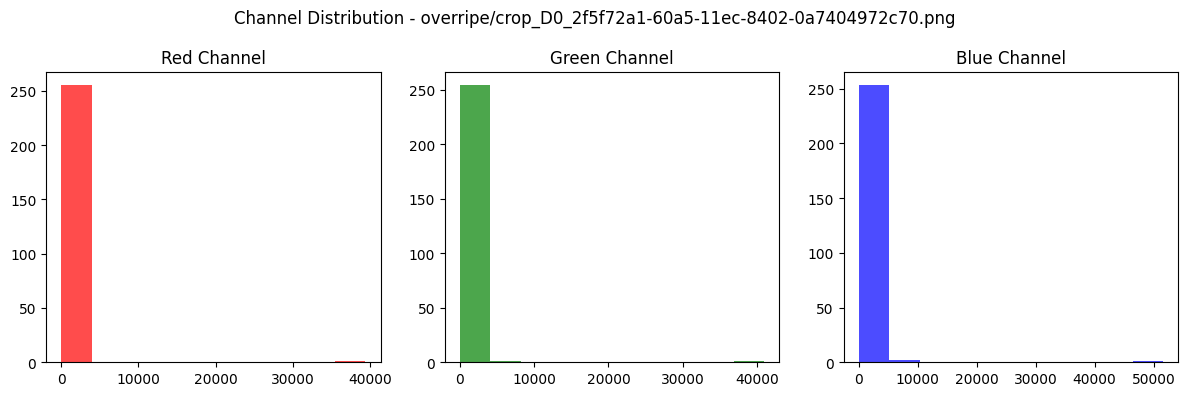

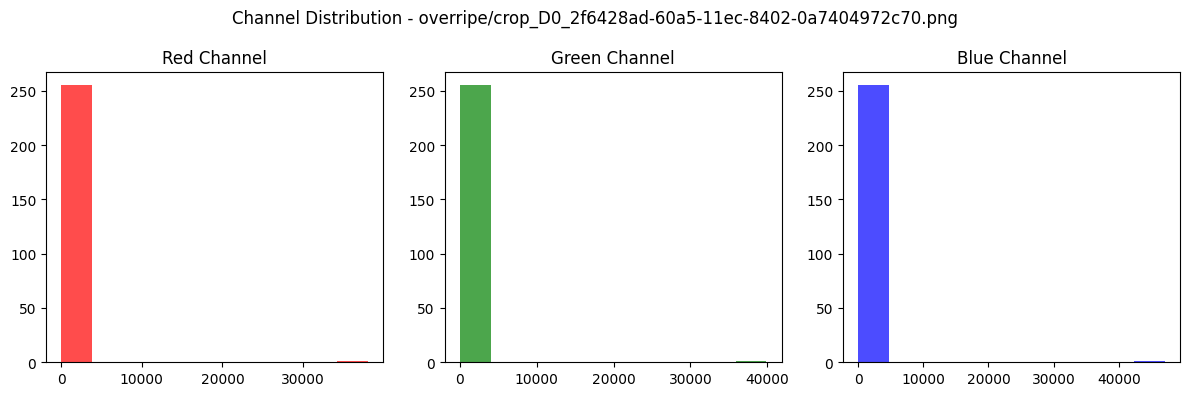

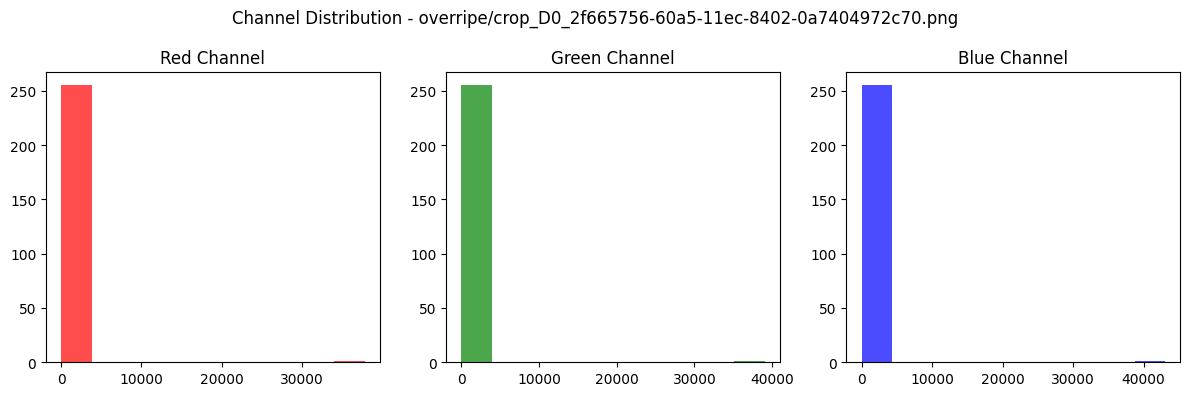

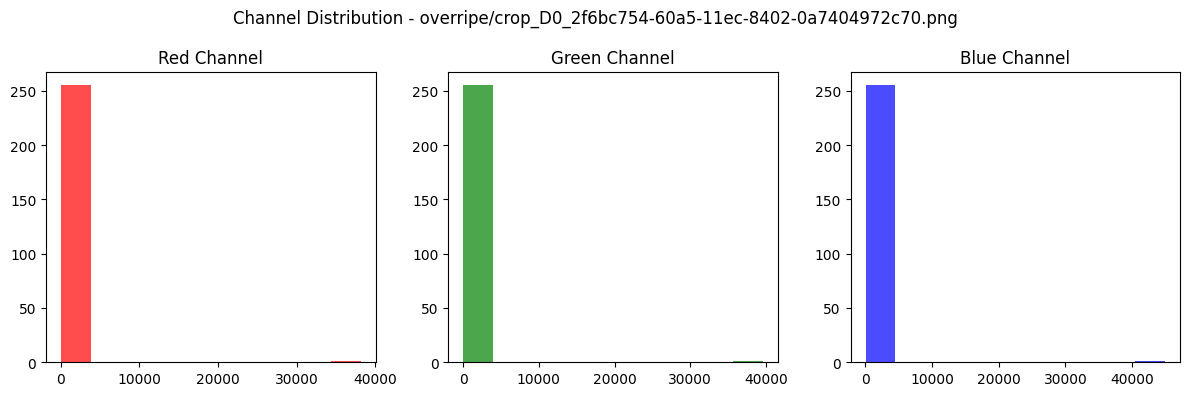

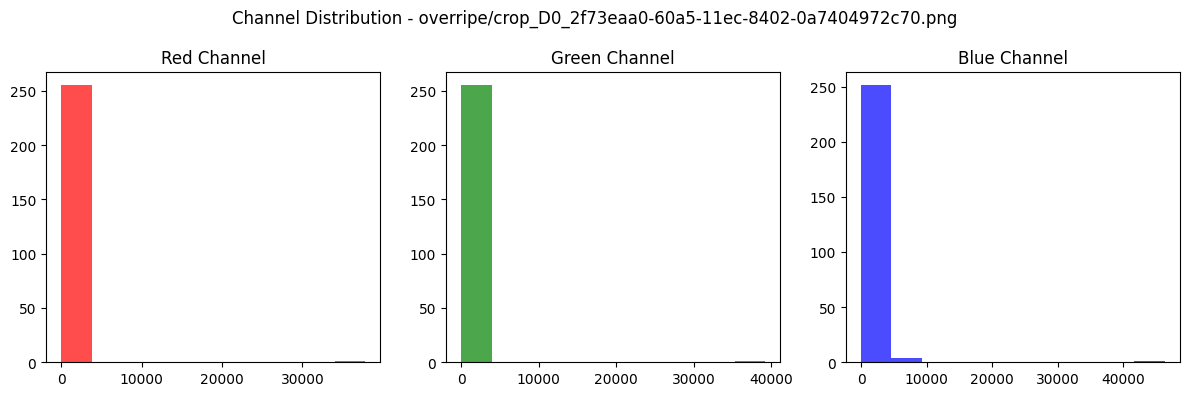

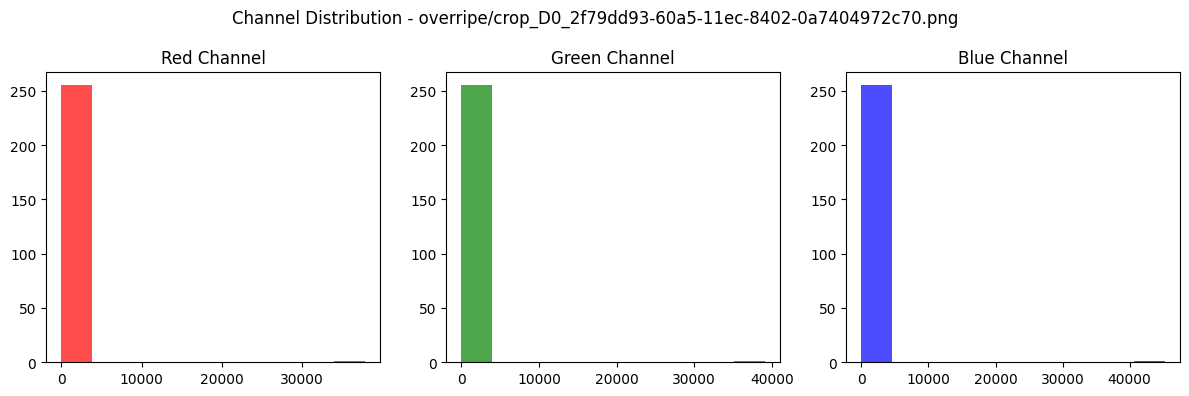

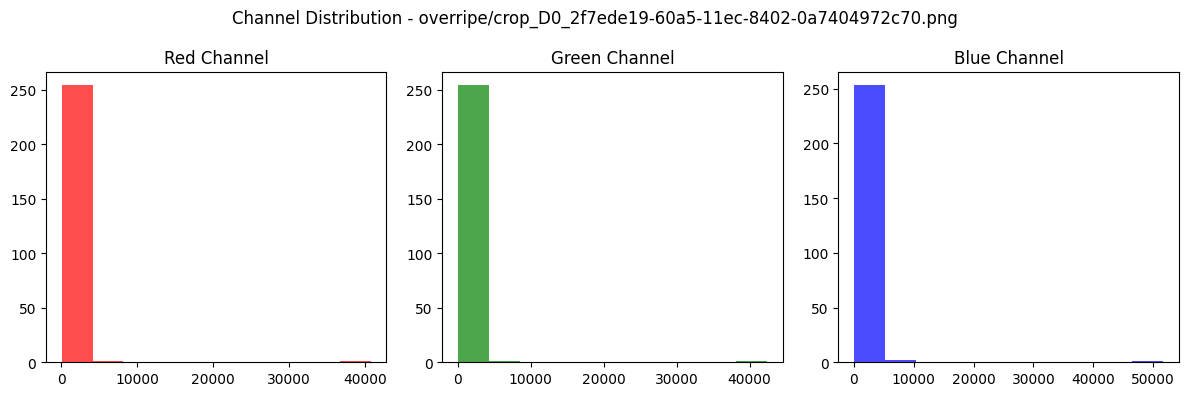

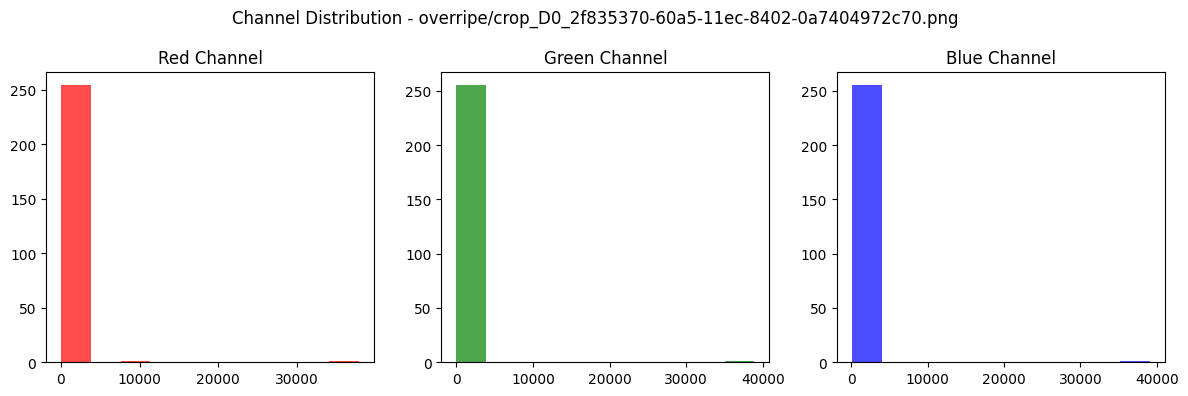

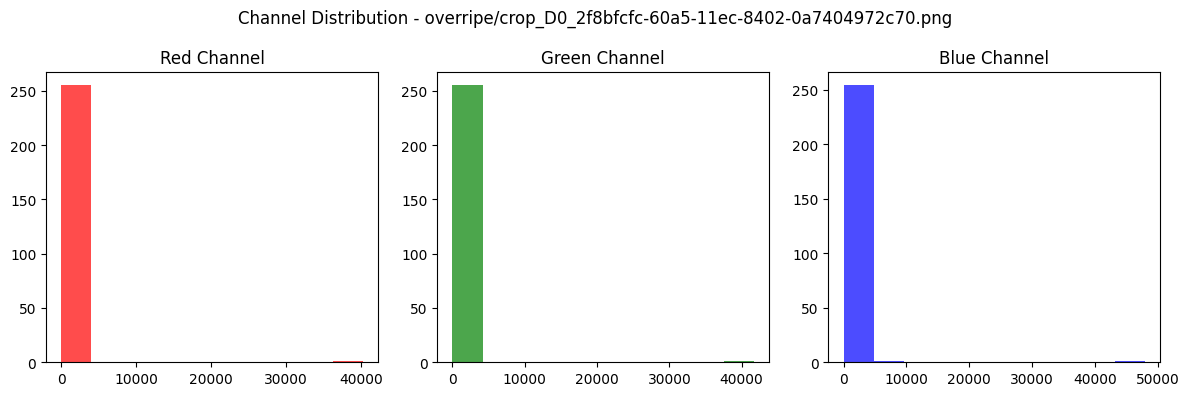

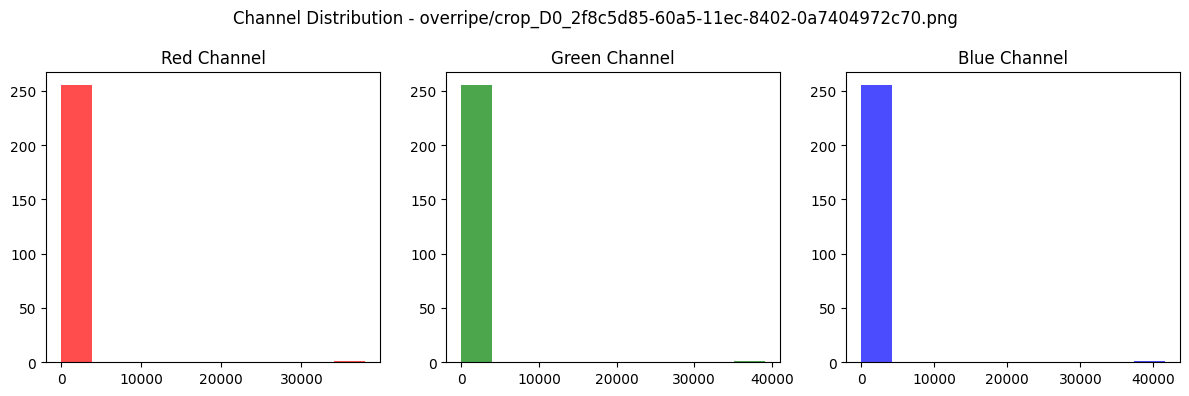

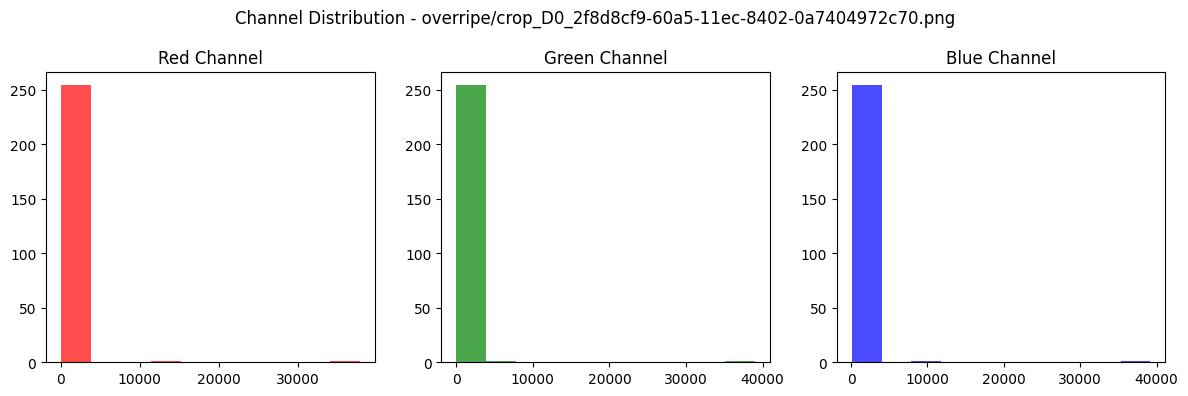

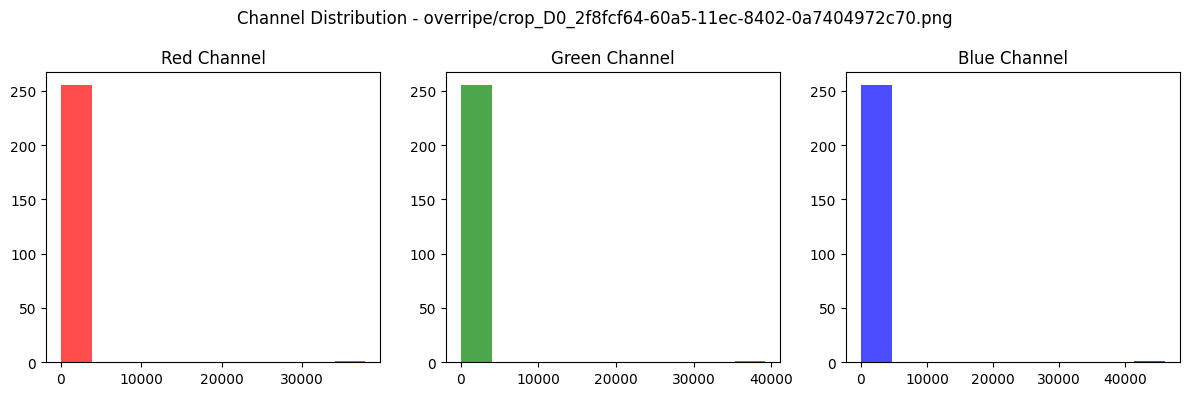

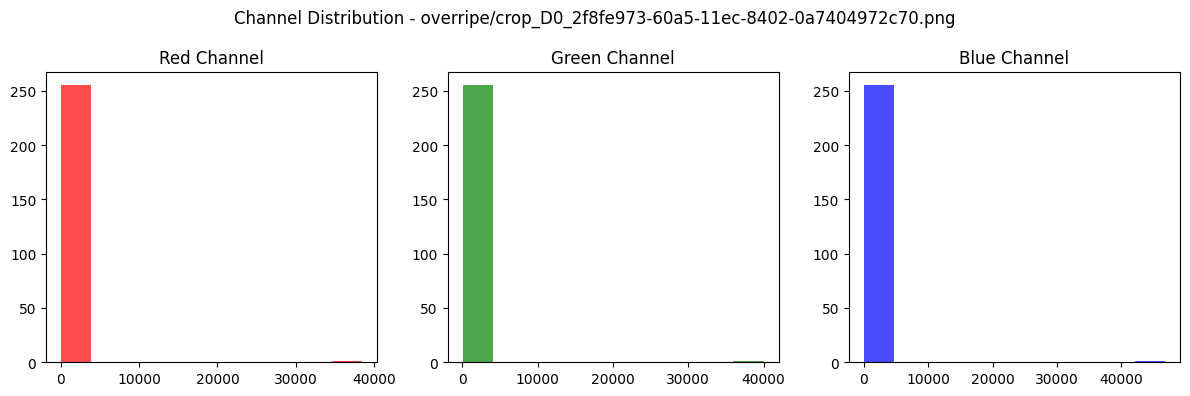

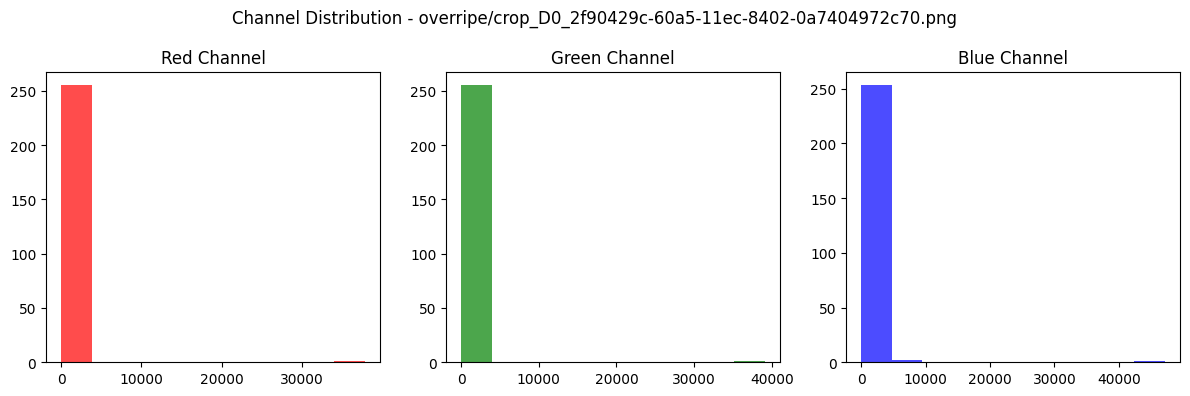

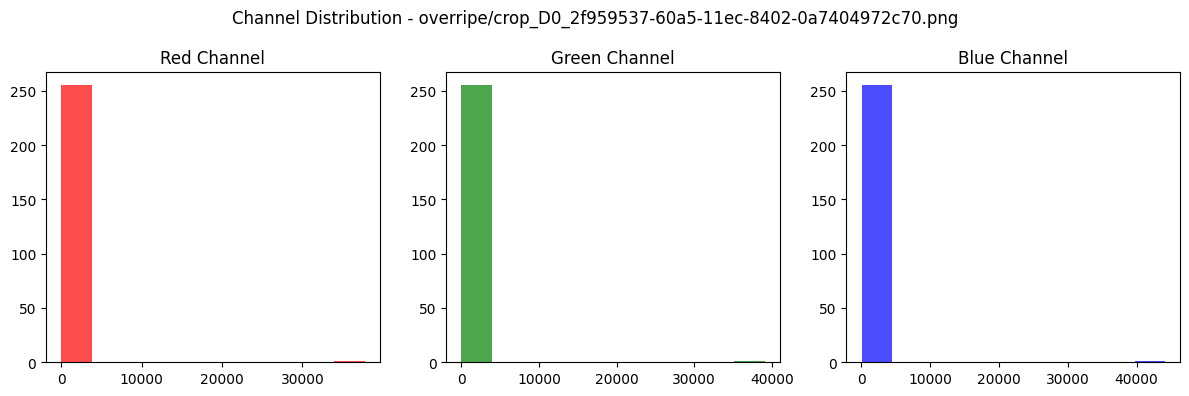

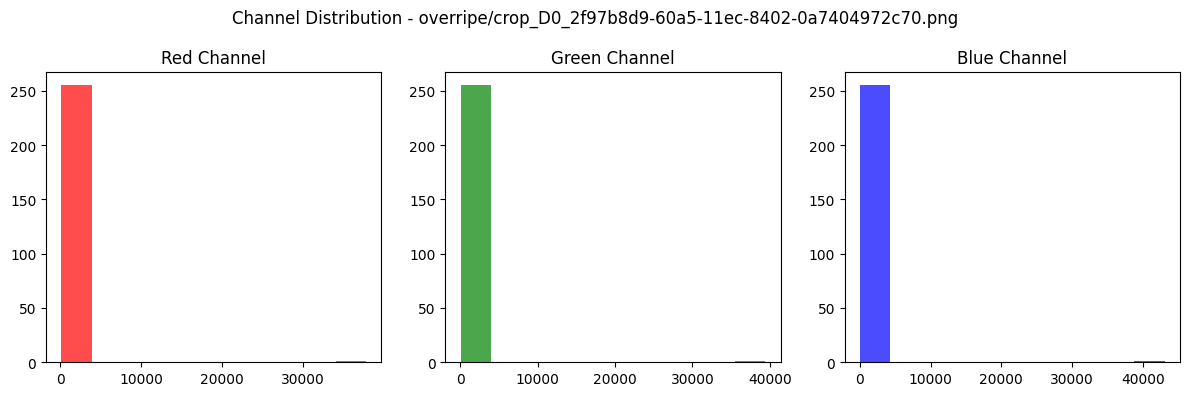

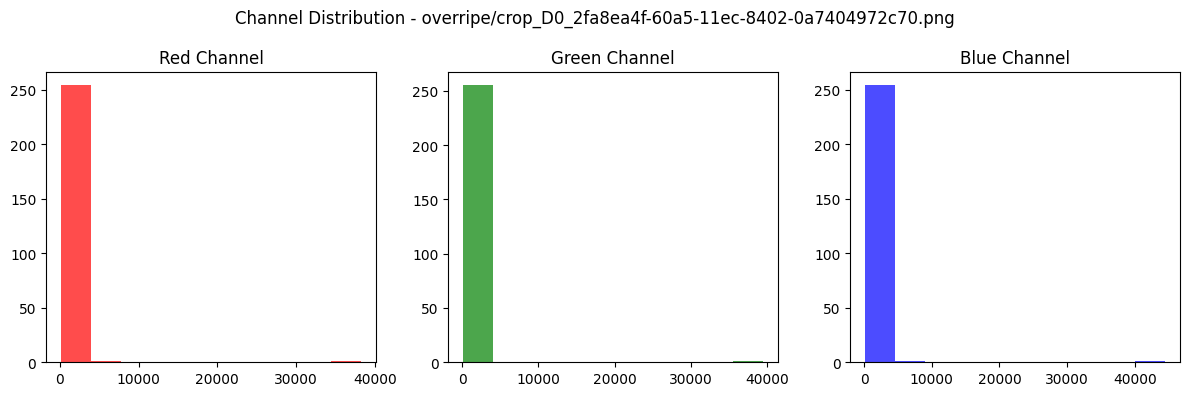

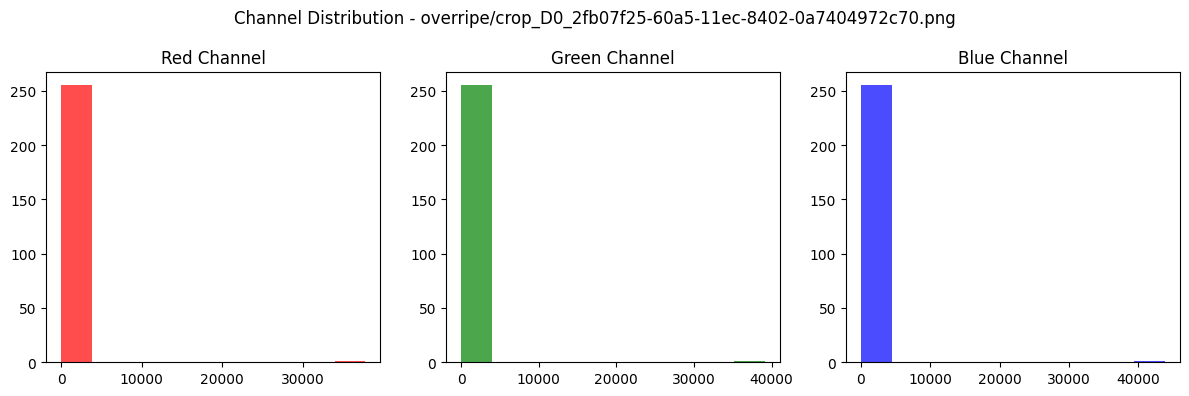

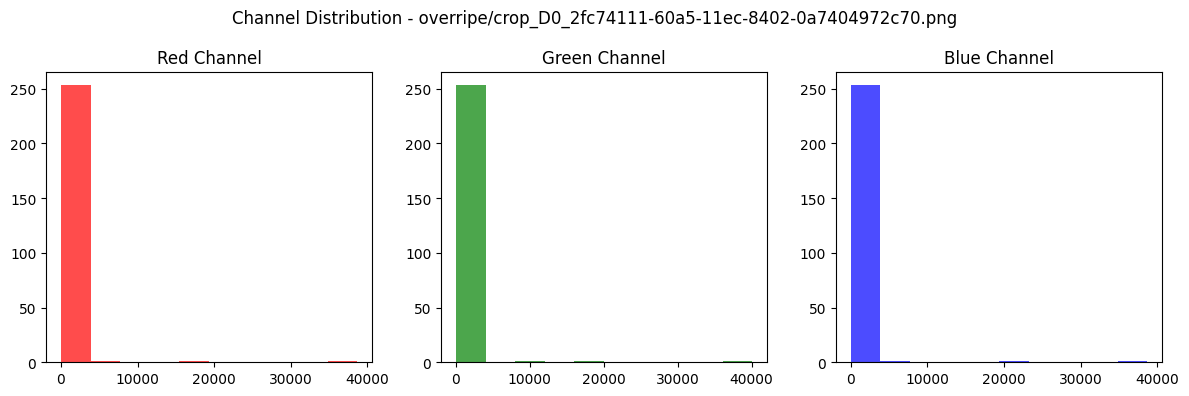

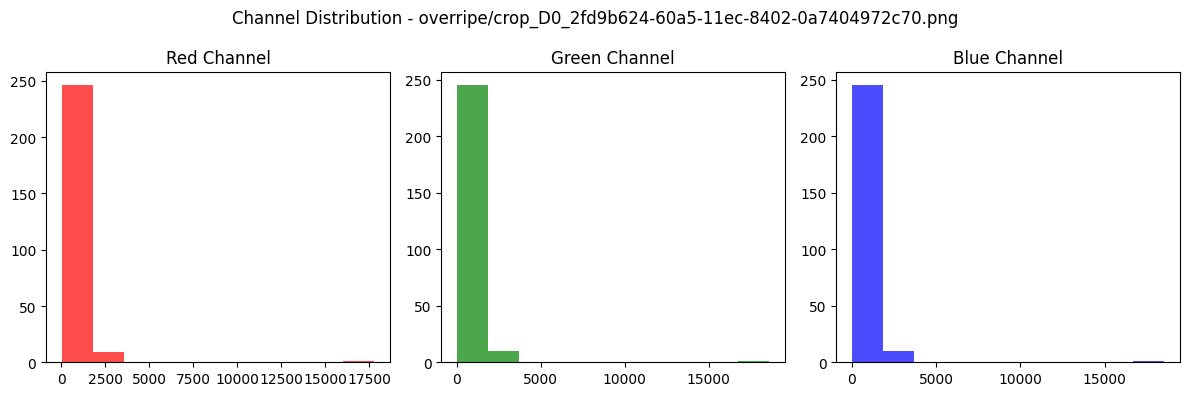

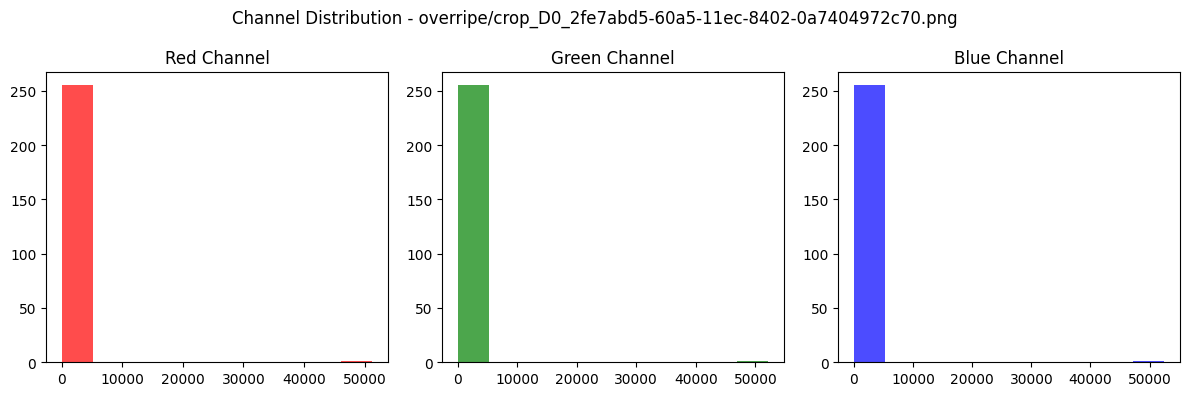

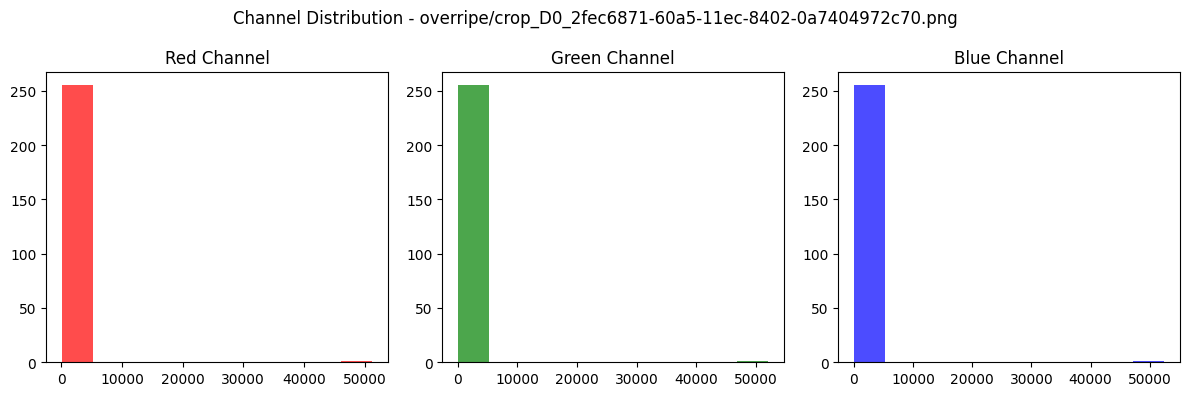

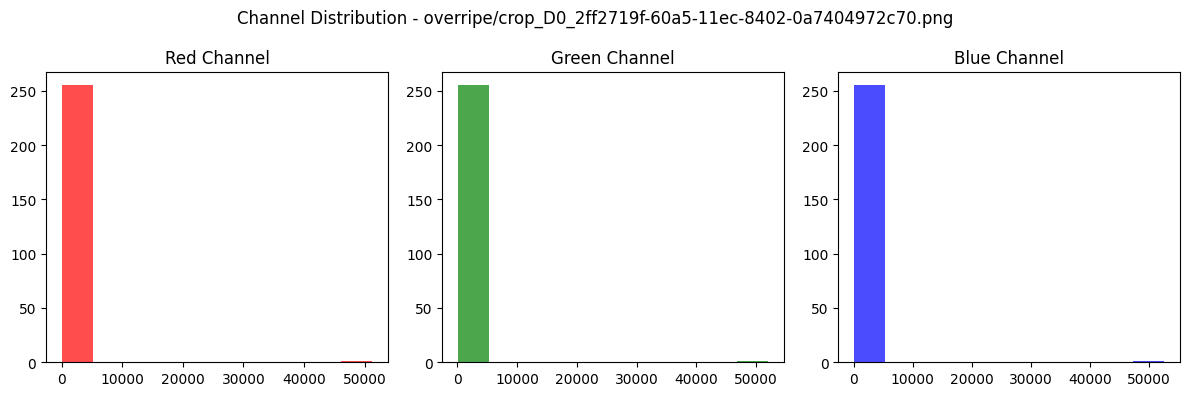

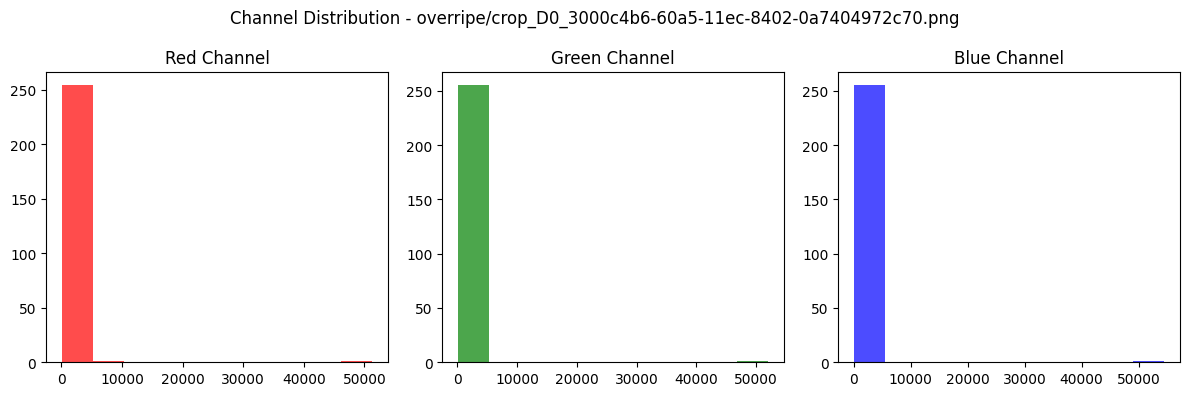

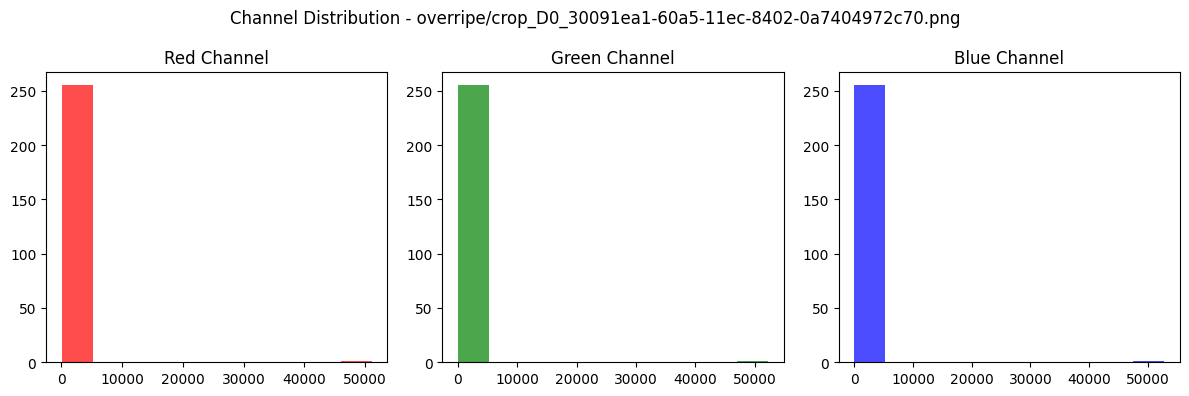

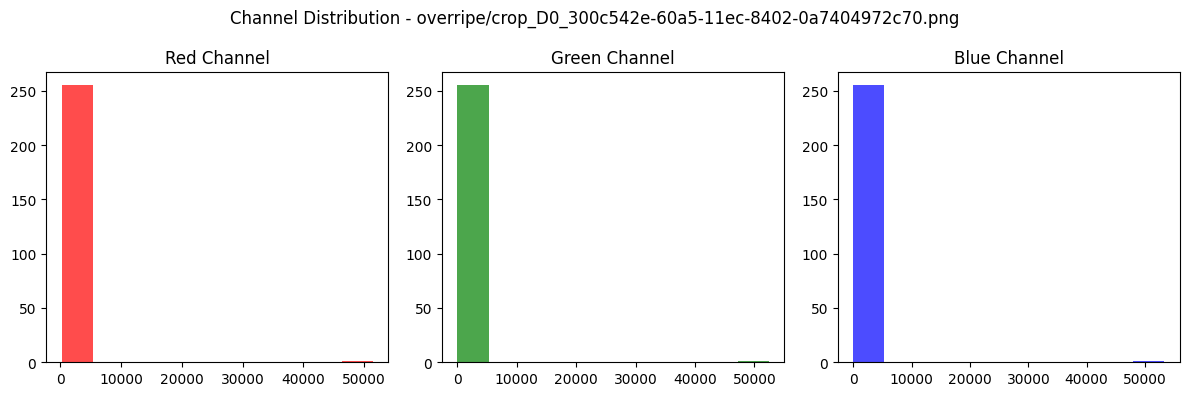

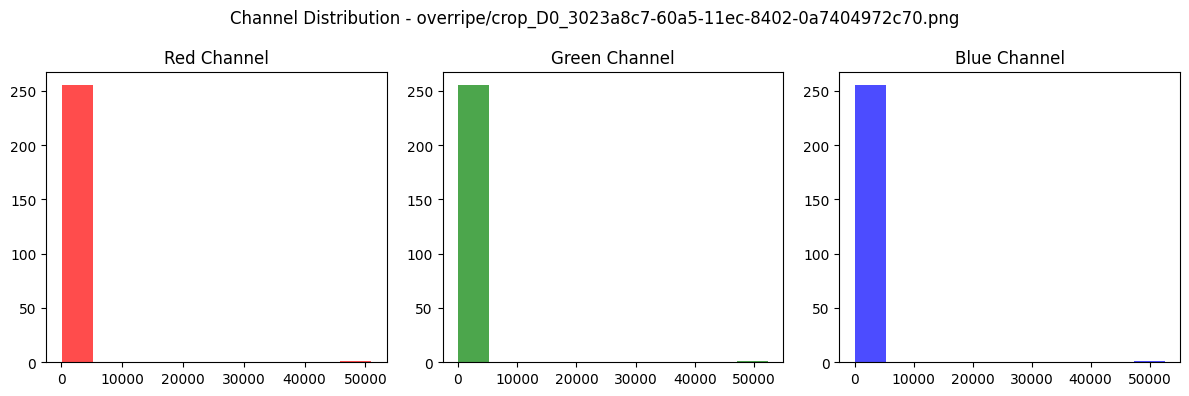

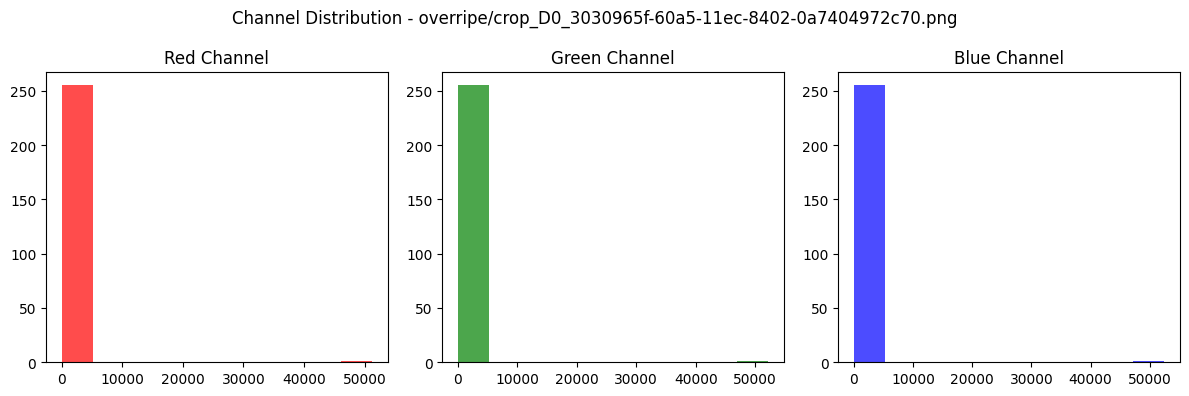

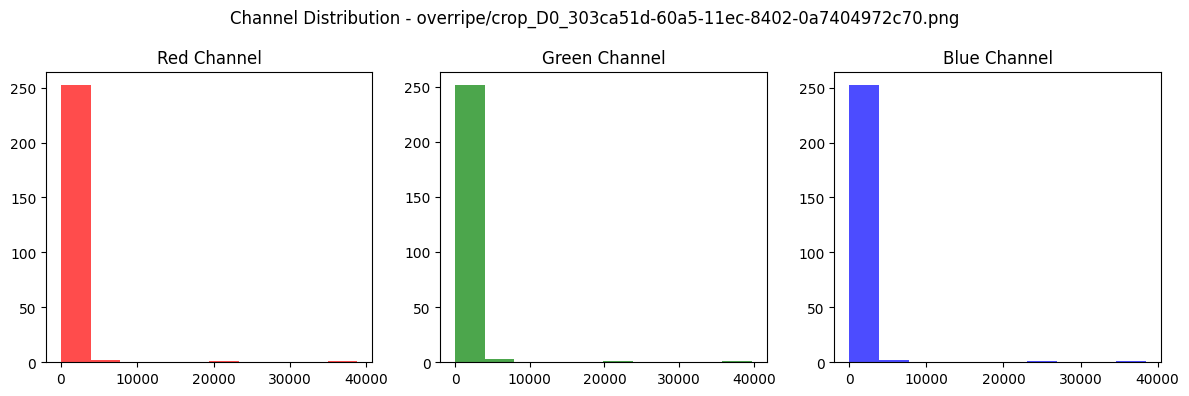

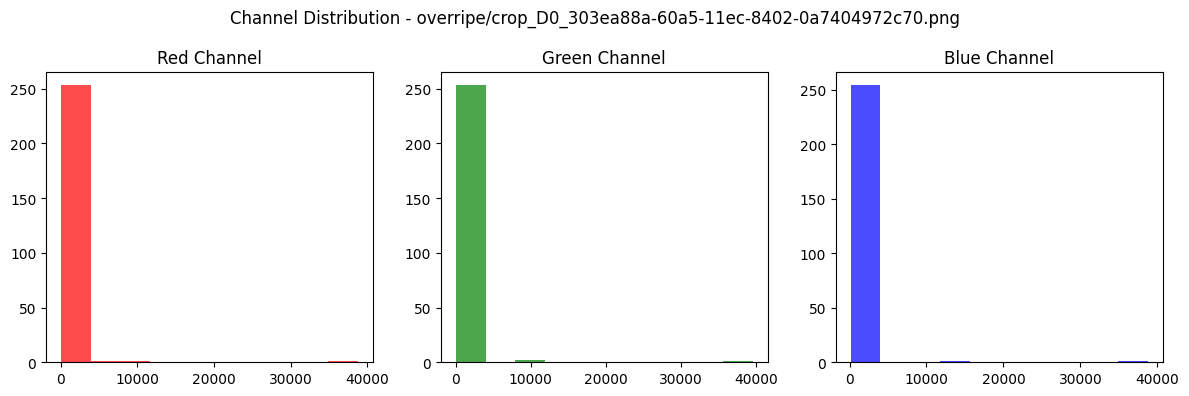

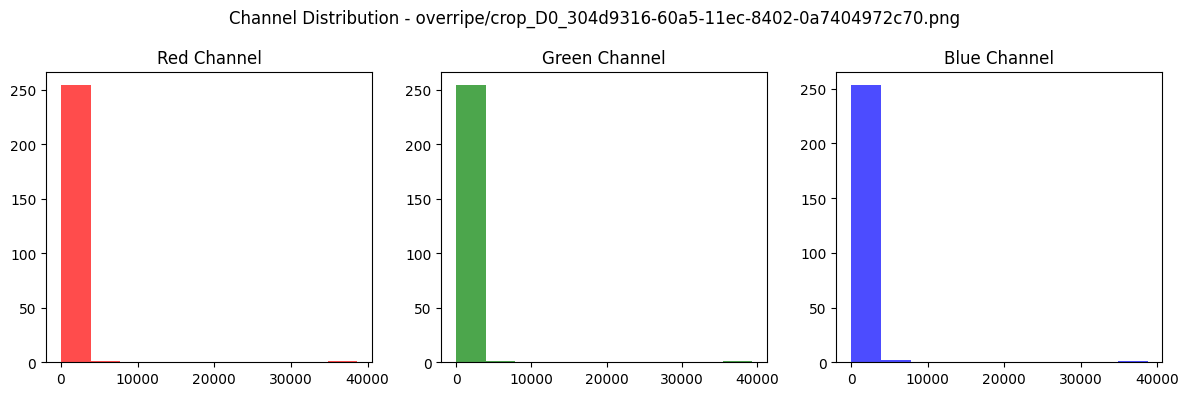

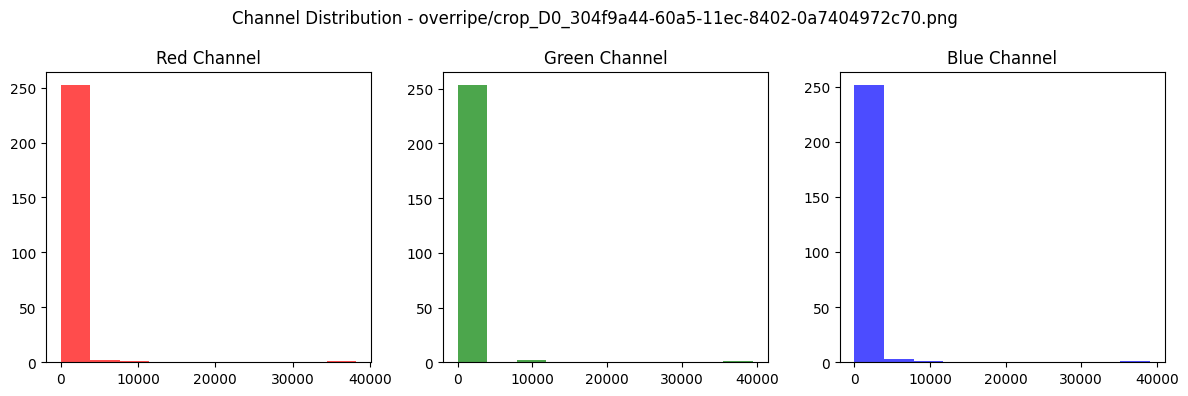

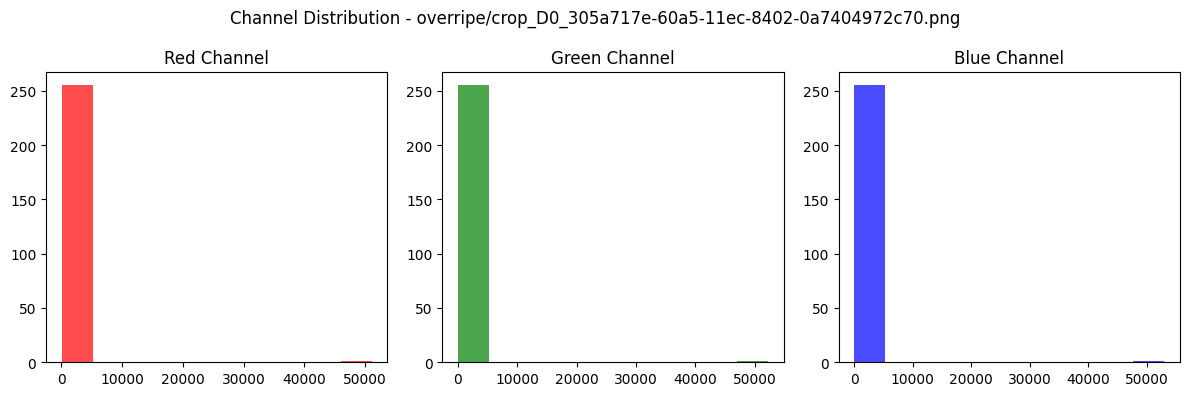

KeyboardInterrupt: 

In [9]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# 각 클래스별 디렉토리 경로
class_dirs = ['overripe', 'no', 'mature', 'incipient']

# 각 클래스별로 채널별 픽셀 값 분포 분석
for class_dir in class_dirs:
    class_path = os.path.join(image_path, class_dir)

    # 클래스 디렉토리 내의 모든 이미지 파일에 대해 반복
    for filename in os.listdir(class_path):
        filepath = os.path.join(class_path, filename)

        # 이미지 파일 읽기
        img = Image.open(filepath)

        # 채널별 픽셀 값 추출
        red, green, blue = img.split()

        # 채널별 픽셀 값 분포 시각화
        fig, axs = plt.subplots(1, 3, figsize=(12, 4))
        axs[0].hist(red.histogram(), color='red', alpha=0.7)
        axs[0].set_title('Red Channel')
        axs[1].hist(green.histogram(), color='green', alpha=0.7)
        axs[1].set_title('Green Channel')
        axs[2].hist(blue.histogram(), color='blue', alpha=0.7)
        axs[2].set_title('Blue Channel')

        plt.suptitle(f"Channel Distribution - {class_dir}/{filename}")
        plt.tight_layout()
        plt.show()

이미지 밝기 분석

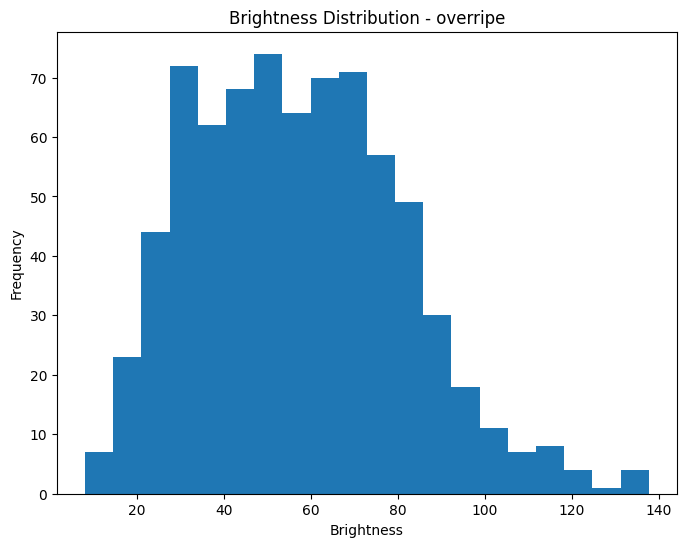

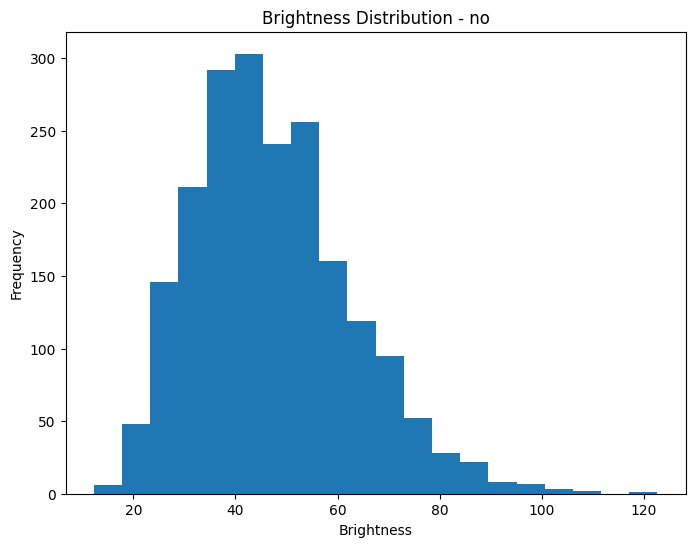

KeyboardInterrupt: 

In [10]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# 각 클래스별 디렉토리 경로
class_dirs = ['overripe', 'no', 'mature', 'incipient']

# 각 클래스별로 이미지 밝기 분포 분석
for class_dir in class_dirs:
    class_path = os.path.join(image_path, class_dir)

    brightness_values = []

    # 클래스 디렉토리 내의 모든 이미지 파일에 대해 반복
    for filename in os.listdir(class_path):
        filepath = os.path.join(class_path, filename)

        # 이미지 파일 읽기
        img = Image.open(filepath)

        # 이미지를 그레이스케일로 변환
        gray_img = img.convert('L')

        # 이미지의 밝기 값 계산
        brightness = sum(gray_img.getdata()) / (gray_img.width * gray_img.height)
        brightness_values.append(brightness)

    # 밝기 분포 시각화
    plt.figure(figsize=(8, 6))
    plt.hist(brightness_values, bins=20)
    plt.title(f"Brightness Distribution - {class_dir}")
    plt.xlabel("Brightness")
    plt.ylabel("Frequency")
    plt.show()

이미지 텍스처 분석

In [11]:
import os
from PIL import Image
from skimage.feature import greycomatrix, greycoprops
import matplotlib.pyplot as plt

# 각 클래스별 디렉토리 경로
class_dirs = ['overripe', 'no', 'mature', 'incipient']

# 각 클래스별로 이미지 텍스처 분석
for class_dir in class_dirs:
    class_path = os.path.join(image_path, class_dir)

    contrast_values = []
    dissimilarity_values = []
    homogeneity_values = []

    # 클래스 디렉토리 내의 모든 이미지 파일에 대해 반복
    for filename in os.listdir(class_path):
        filepath = os.path.join(class_path, filename)

        # 이미지 파일 읽기
        img = Image.open(filepath)

        # 이미지를 그레이스케일로 변환
        gray_img = img.convert('L')

        # GLCM 계산
        glcm = greycomatrix(gray_img, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

        # 텍스처 특징 계산
        contrast = greycoprops(glcm, 'contrast')[0, 0]
        dissimilarity = greycoprops(glcm, 'dissimilarity')[0, 0]
        homogeneity = greycoprops(glcm, 'homogeneity')[0, 0]

        contrast_values.append(contrast)
        dissimilarity_values.append(dissimilarity)
        homogeneity_values.append(homogeneity)

    # 텍스처 특징 분포 시각화
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    axs[0].hist(contrast_values, bins=20)
    axs[0].set_title('Contrast')
    axs[1].hist(dissimilarity_values, bins=20)
    axs[1].set_title('Dissimilarity')
    axs[2].hist(homogeneity_values, bins=20)
    axs[2].set_title('Homogeneity')

    plt.suptitle(f"Texture Features Distribution - {class_dir}")
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')


ValueError: buffer source array is read-only

이미지 유사도 분석

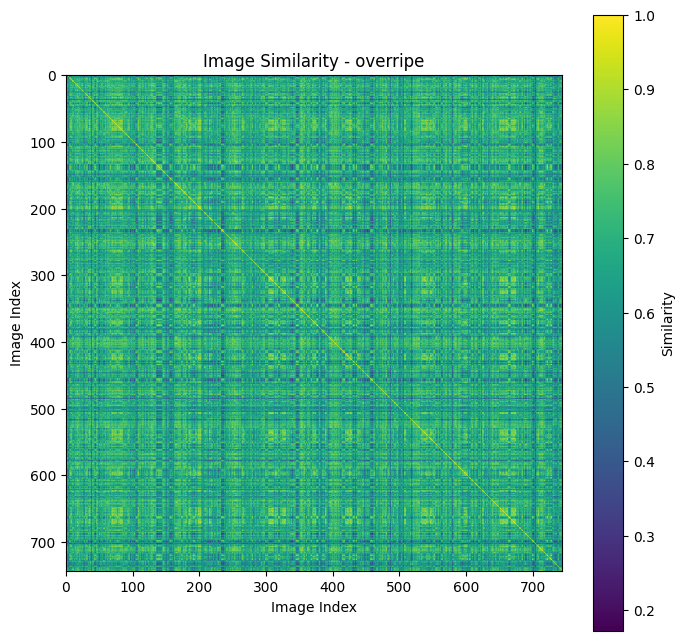

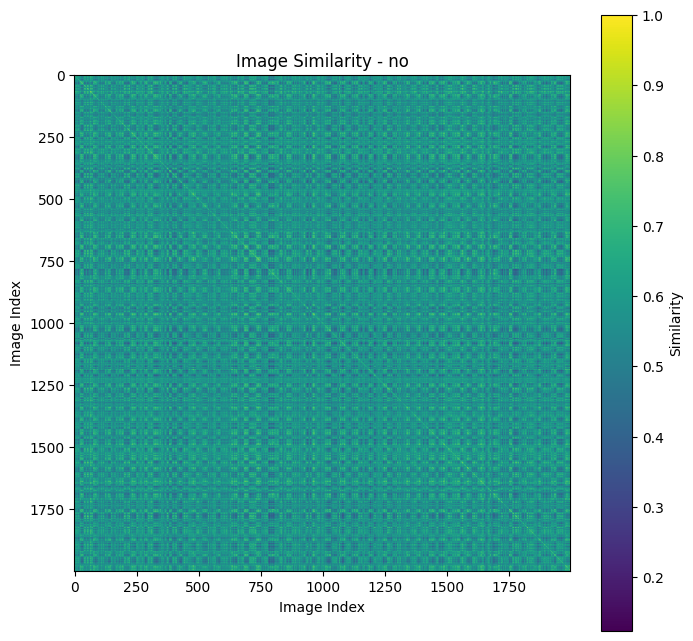

KeyboardInterrupt: 

In [12]:
import os
from PIL import Image
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt

# 각 클래스별 디렉토리 경로
class_dirs = ['overripe', 'no', 'mature', 'incipient']

# 이미지 특징 벡터 추출 함수
def extract_features(img):
    # 이미지를 grayscale로 변환하고 크기 조정
    img = img.convert('L').resize((64, 64))
    # 이미지를 1차원 벡터로 변환
    feature_vector = np.array(img).flatten()
    return feature_vector

# 각 클래스별로 이미지 유사도 분석
for class_dir in class_dirs:
    class_path = os.path.join(image_path, class_dir)

    feature_vectors = []

    # 클래스 디렉토리 내의 모든 이미지 파일에 대해 반복
    for filename in os.listdir(class_path):
        filepath = os.path.join(class_path, filename)

        # 이미지 파일 읽기
        img = Image.open(filepath)

        # 이미지 특징 벡터 추출
        feature_vector = extract_features(img)
        feature_vectors.append(feature_vector)

    # 코사인 유사도 계산
    similarity_matrix = cosine_similarity(feature_vectors)

    # 유사도 행렬 시각화
    plt.figure(figsize=(8, 8))
    plt.imshow(similarity_matrix, cmap='viridis')
    plt.colorbar(label='Similarity')
    plt.title(f"Image Similarity - {class_dir}")
    plt.xlabel("Image Index")
    plt.ylabel("Image Index")
    plt.show()

# 이상치에 대한 시각화